Importing Required Libraries and Tools

In [ ]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Clustering
from sklearn.cluster import KMeans

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting & warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

 Loading the EV Dataset

In [ ]:
# Load the primary EV dataset from CSV file

df_ev = pd.read_csv("EV_Dataset.csv")

#SECTION A: Exploring the data

Initial Data Inspection – Shape and Preview


In [ ]:
# Display shape and head

print(f"Shape: {df_ev.shape}")
df_ev.head()

Shape: (96845, 8)


Year Month_Name      Date           State         Vehicle_Class  \
0  2014        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                  0  
1           Others       Others                  0  
2           Others       Others                  0  
3           Others       Others                  0  
4              Bus          Bus                  0

Dataset Structure Overview

In [ ]:
#Dataset info

df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


Displaying All Column Names in the Dataset

In [ ]:
# Column names

print("Columns in dataset:\n", df_ev.columns.tolist())

Columns in dataset:
 ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']


Generating Descriptive Statistics for All Columns

In [ ]:
# Descriptive stats

df_ev.describe(include='all')

Year Month_Name      Date        State Vehicle_Class  \
count   96845.000000      96845     96845        96845         96845   
unique           NaN         12       121           34            73   
top              NaN        jan  3/1/2020  Maharashtra     MOTOR CAR   
freq             NaN       8853       933         4912          4111   
mean     2018.622768        NaN       NaN          NaN           NaN   
std         2.895581        NaN       NaN          NaN           NaN   
min      2014.000000        NaN       NaN          NaN           NaN   
25%      2016.000000        NaN       NaN          NaN           NaN   
50%      2019.000000        NaN       NaN          NaN           NaN   
75%      2021.000000        NaN       NaN          NaN           NaN   
max      2024.000000        NaN       NaN          NaN           NaN   

       Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
count             96845        96845       96845.000000  
unique                5           12                NaN  
top              Others       Others                NaN  
freq              54423        54423                NaN  
mean                NaN          NaN          37.108896  
std                 NaN          NaN         431.566675  
min                 NaN          NaN           0.000000  
25%                 NaN          NaN           0.000000  
50%                 NaN          NaN           0.000000  
75%                 NaN          NaN           0.000000  
max                 NaN          NaN       20584.000000

Checking for Missing Values in the Dataset

In [ ]:
# Missing value summary

missing = df_ev.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

Standardize Column Names

In [ ]:
df_ev.columns = df_ev.columns.str.strip().str.lower().str.replace(' ', '_')
df_ev.head()

year month_name      date           state         vehicle_class  \
0  2014        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        jan  1/1/2014  Andhra Pradesh                   BUS   

  vehicle_category vehicle_type  ev_sales_quantity  
0           Others       Others                  0  
1           Others       Others                  0  
2           Others       Others                  0  
3           Others       Others                  0  
4              Bus          Bus                  0

Convert Dates & Remove 2024 Data

In [ ]:
# Convert 'date' column to datetime

df_ev['date'] = pd.to_datetime(df_ev['date'], errors='coerce')
df_ev[['date', 'year', 'month_name']].head()

# Remove data from 2024 due to insufficient data

df_ev = df_ev[df_ev['date'].dt.year != 2024]

Check Unique Vehicle Types

In [ ]:
# Unique values in vehicle_type

print("Unique Vehicle Types:\n", df_ev['vehicle_type'].unique())

Unique Vehicle Types:
 ['Others' 'Bus' 'Institution Bus' '2W_Personal' '4W_Shared' '4W_Personal'
 '3W_Shared' '3W_Personal' '3W_Goods' '2W_Shared' '3W_Shared_LowSpeed'
 '3W_Goods_LowSpeed']


Visualize Vehicle Type Distribution

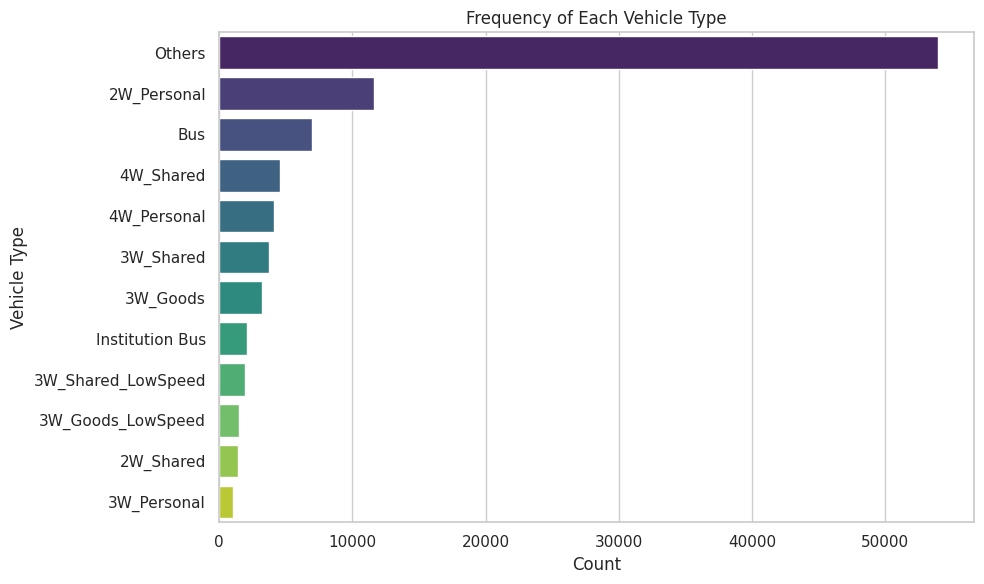

In [ ]:
# Plot frequency of each vehicle type

plt.figure(figsize=(10,6))
sns.countplot(data=df_ev, y='vehicle_type', order=df_ev['vehicle_type'].value_counts().index, palette='viridis')
plt.title("Frequency of Each Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

Top 10 EV Vehicle Classes by Sales

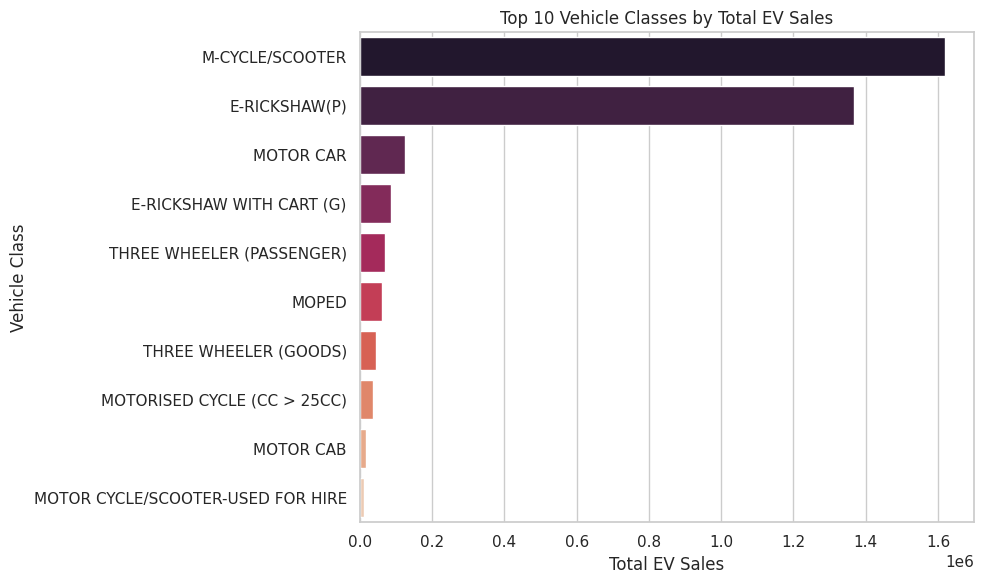

In [ ]:
top_classes = df_ev.groupby('vehicle_class')['ev_sales_quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_classes.values, y=top_classes.index, palette='rocket')
plt.title("Top 10 Vehicle Classes by Total EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("Vehicle Class")
plt.tight_layout()
plt.show()

Total EV Sales by Vehicle Type

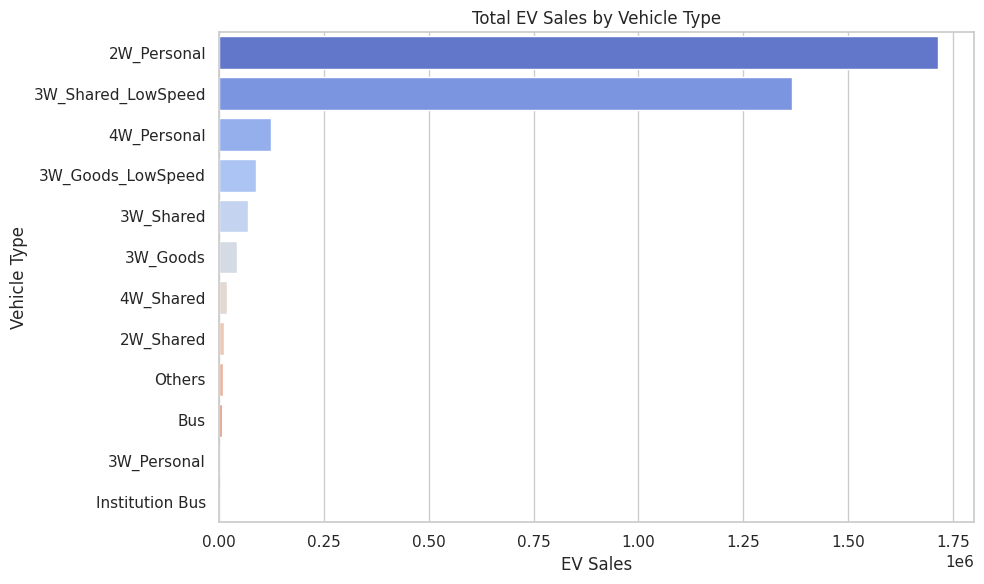

In [ ]:
type_sales = df_ev.groupby('vehicle_type')['ev_sales_quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=type_sales.values, y=type_sales.index, palette='coolwarm')
plt.title("Total EV Sales by Vehicle Type")
plt.xlabel("EV Sales")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

EV Sales Quantity Distribution (Log Scale)

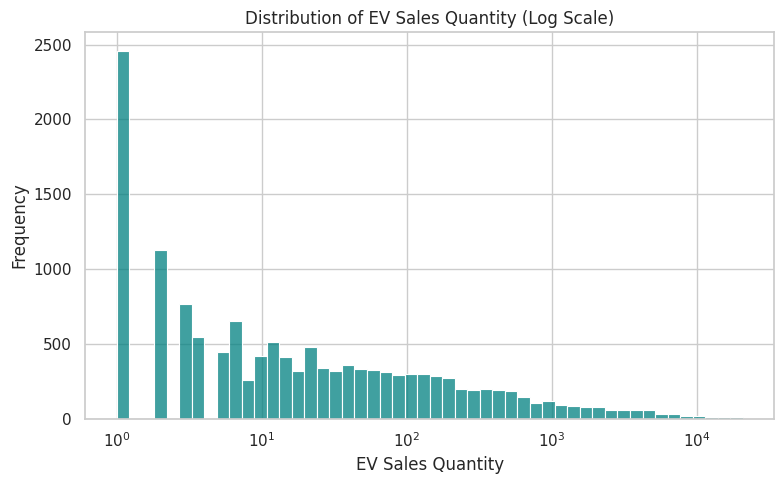

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_ev['ev_sales_quantity'], bins=50, log_scale=True, color='teal')
plt.title("Distribution of EV Sales Quantity (Log Scale)")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Identify EV Sales Outliers (Above 99th Percentile)

In [ ]:
# Check for extreme EV sales values

outliers = df_ev[df_ev['ev_sales_quantity'] > df_ev['ev_sales_quantity'].quantile(0.99)]
print("Outliers (>99th percentile):")
outliers[['state', 'vehicle_type', 'ev_sales_quantity']].sort_values(by='ev_sales_quantity', ascending=False).head(10)

Outliers (>99th percentile):


state        vehicle_type  ev_sales_quantity
64430  Uttar Pradesh  3W_Shared_LowSpeed              20584
96650  Uttar Pradesh  3W_Shared_LowSpeed              20352
40513    Maharashtra         2W_Personal              19908
72478  Uttar Pradesh  3W_Shared_LowSpeed              19486
56533  Uttar Pradesh  3W_Shared_LowSpeed              18769
88188    Maharashtra         2W_Personal              18422
80494  Uttar Pradesh  3W_Shared_LowSpeed              17675
88603  Uttar Pradesh  3W_Shared_LowSpeed              17490
48691  Uttar Pradesh  3W_Shared_LowSpeed              16887
40421      Karnataka         2W_Personal              16602

# SECTION B: Vehicle Type Segmentation & Distribution

Total EV Sales by Vehicle Category

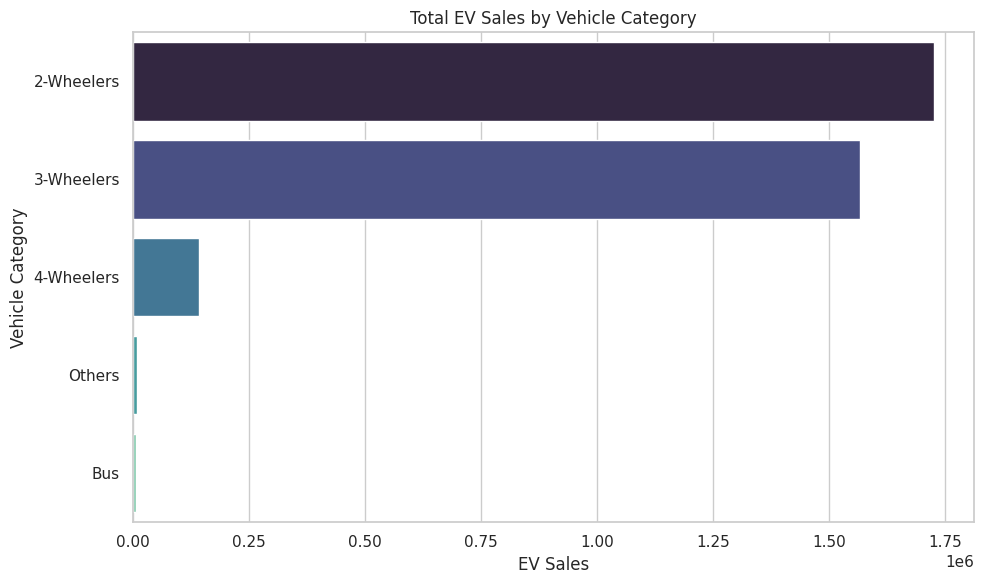

In [ ]:
category_sales = df_ev.groupby('vehicle_category')['ev_sales_quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='mako')
plt.title("Total EV Sales by Vehicle Category")
plt.xlabel("EV Sales")
plt.ylabel("Vehicle Category")
plt.tight_layout()
plt.show()

EV Sales Proportion by Vehicle Type (Pie Chart)

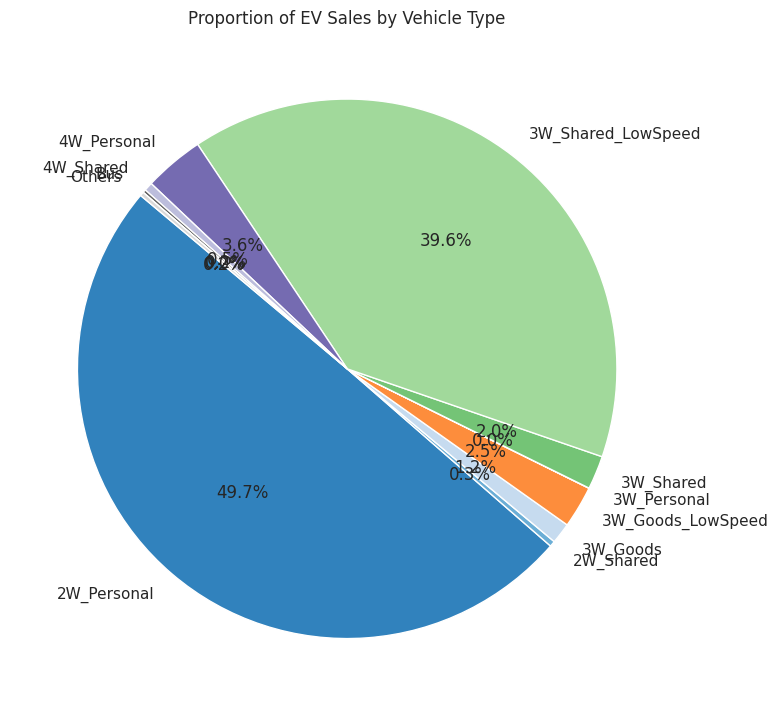

In [ ]:
type_sales = df_ev.groupby('vehicle_type')['ev_sales_quantity'].sum()
plt.figure(figsize=(8,8))
type_sales.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title("Proportion of EV Sales by Vehicle Type")
plt.ylabel("")
plt.tight_layout()
plt.show()

Heatmap of EV Sales by Vehicle Type and Category

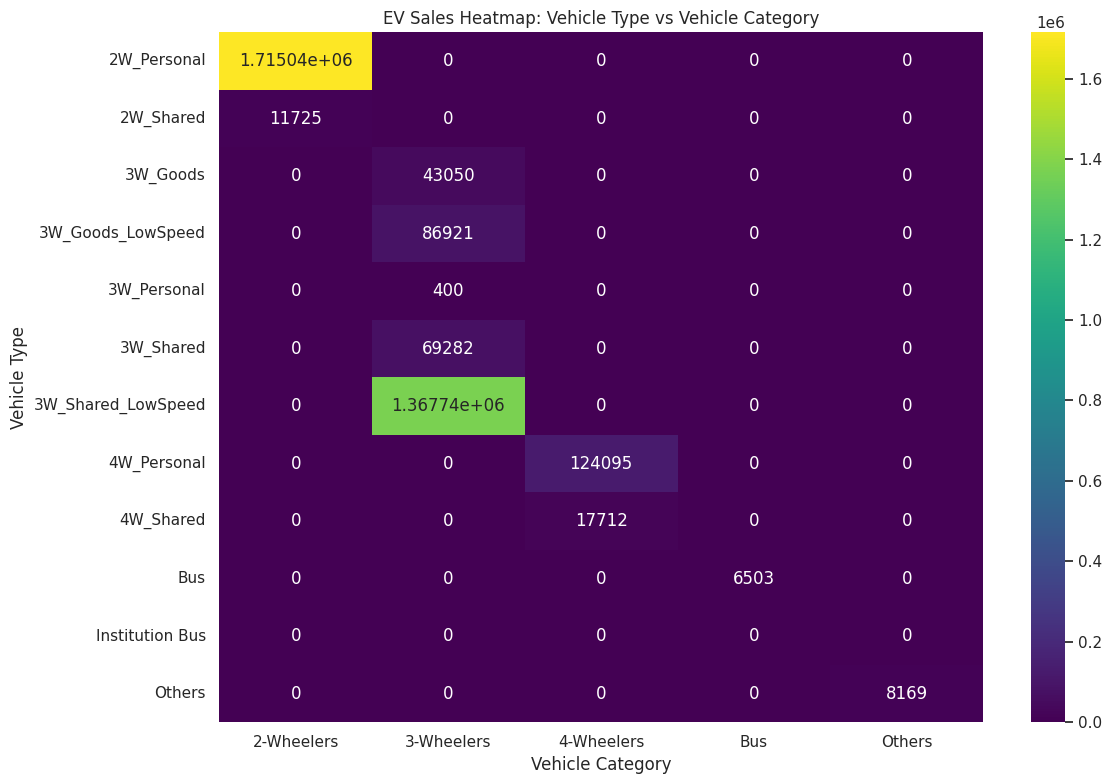

In [ ]:
pivot_table = df_ev.pivot_table(index='vehicle_type', columns='vehicle_category',
                                 values='ev_sales_quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.title("EV Sales Heatmap: Vehicle Type vs Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

Vehicle Category Counts by Vehicle Type

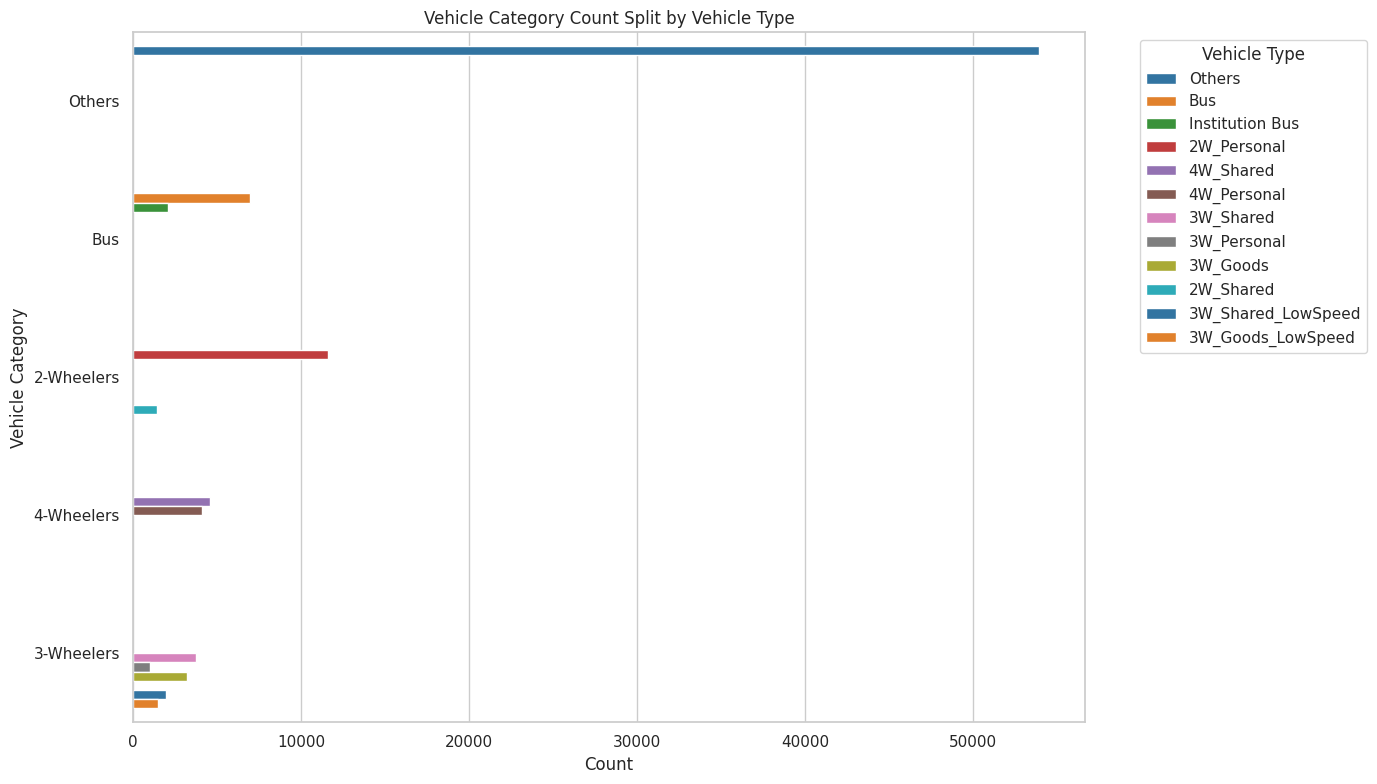

In [ ]:
# Countplot - Vehicle Category split by Vehicle Type

plt.figure(figsize=(14,8))
sns.countplot(data=df_ev, y='vehicle_category', hue='vehicle_type', palette='tab10')
plt.title("Vehicle Category Count Split by Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Vehicle Category")
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Boxplot of EV Sales by Vehicle Type

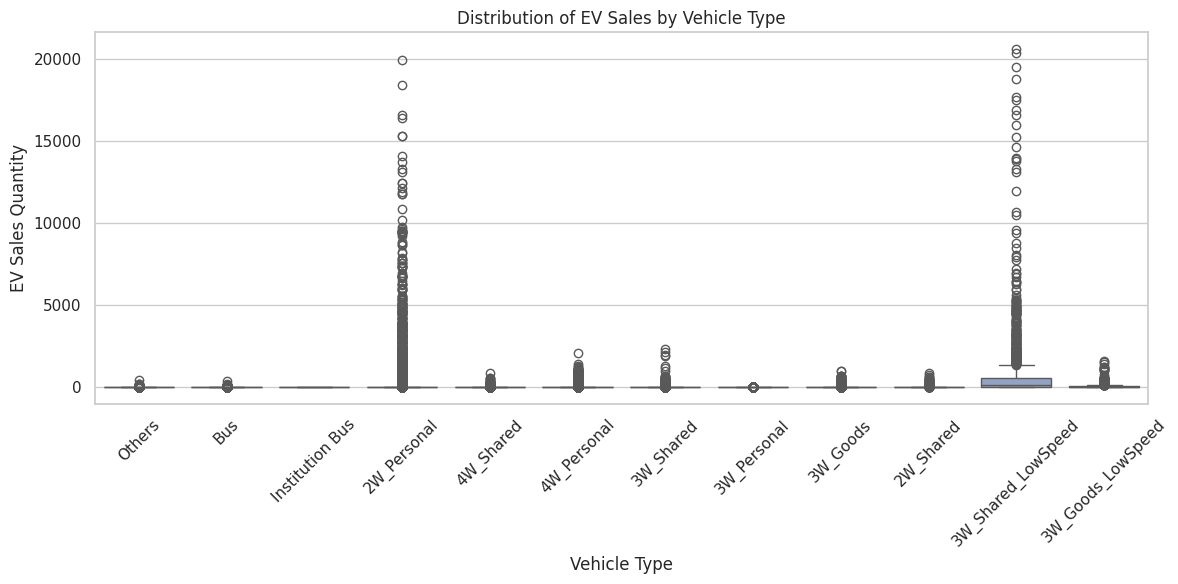

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_ev, x='vehicle_type', y='ev_sales_quantity', palette='Set2')
plt.xticks(rotation=45)
plt.title("Distribution of EV Sales by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("EV Sales Quantity")
plt.tight_layout()
plt.show()

Summary Statistics of EV Sales by Vehicle Type

In [ ]:
# Summary statistics per vehicle type

type_stats = df_ev.groupby('vehicle_type')['ev_sales_quantity'].describe()
type_stats

count        mean          std  min    25%    50%  \
vehicle_type                                                              
2W_Personal         11596.0  147.899017   881.531528  0.0   0.00    0.0   
2W_Shared            1406.0    8.339260    57.308065  0.0   0.00    0.0   
3W_Goods             3178.0   13.546256    57.947128  0.0   0.00    0.0   
3W_Goods_LowSpeed    1497.0   58.063460   135.967834  0.0   4.00   15.0   
3W_Personal          1019.0    0.392542     1.271952  0.0   0.00    0.0   
3W_Shared            3754.0   18.455514    92.048654  0.0   0.00    0.0   
3W_Shared_LowSpeed   1928.0  709.406120  1874.287448  0.0  12.75  135.0   
4W_Personal          4077.0   30.437822   120.235106  0.0   0.00    0.0   
4W_Shared            4542.0    3.899604    28.141689  0.0   0.00    0.0   
Bus                  6959.0    0.934473     7.941889  0.0   0.00    0.0   
Institution Bus      2074.0    0.000000     0.000000  0.0   0.00    0.0   
Others              53955.0    0.151404     3.082481  0.0   0.00    0.0   

                      75%      max  
vehicle_type                        
2W_Personal           4.0  19908.0  
2W_Shared             0.0    861.0  
3W_Goods              1.0    978.0  
3W_Goods_LowSpeed    53.0   1607.0  
3W_Personal           0.0     15.0  
3W_Shared             3.0   2321.0  
3W_Shared_LowSpeed  554.0  20584.0  
4W_Personal           5.0   2049.0  
4W_Shared             0.0    854.0  
Bus                   0.0    348.0  
Institution Bus       0.0      0.0  
Others                0.0    431.0

Top 5 Vehicle Types by EV Sales per Category

In [ ]:
# Top 5 vehicle types per vehicle category

top5_types_per_category = df_ev.groupby(['vehicle_category', 'vehicle_type'])['ev_sales_quantity'] \
                                .sum().reset_index().sort_values(['vehicle_category', 'ev_sales_quantity'], ascending=[True, False])

top5_filtered = top5_types_per_category.groupby('vehicle_category').head(5)
top5_filtered

vehicle_category        vehicle_type  ev_sales_quantity
0        2-Wheelers         2W_Personal            1715037
1        2-Wheelers           2W_Shared              11725
6        3-Wheelers  3W_Shared_LowSpeed            1367735
3        3-Wheelers   3W_Goods_LowSpeed              86921
5        3-Wheelers           3W_Shared              69282
2        3-Wheelers            3W_Goods              43050
4        3-Wheelers         3W_Personal                400
7        4-Wheelers         4W_Personal             124095
8        4-Wheelers           4W_Shared              17712
9               Bus                 Bus               6503
10              Bus     Institution Bus                  0
11           Others              Others               8169

Crosstab of Vehicle Class vs Vehicle Type

In [ ]:
# Crosstab: Vehicle Type vs Vehicle Class

crosstab_class_type = pd.crosstab(df_ev['vehicle_class'], df_ev['vehicle_type'])
crosstab_class_type.head()

vehicle_type                  2W_Personal  2W_Shared  3W_Goods  \
vehicle_class                                                    
ADAPTED VEHICLE                         0          0         0   
AGRICULTURAL TRACTOR                    0          0         0   
AMBULANCE                               0          0         0   
ANIMAL AMBULANCE                        0          0         0   
ARMOURED/SPECIALISED VEHICLE            0          0         0   

vehicle_type                  3W_Goods_LowSpeed  3W_Personal  3W_Shared  \
vehicle_class                                                             
ADAPTED VEHICLE                               0            0          0   
AGRICULTURAL TRACTOR                          0            0          0   
AMBULANCE                                     0            0          0   
ANIMAL AMBULANCE                              0            0          0   
ARMOURED/SPECIALISED VEHICLE                  0            0          0   

vehicle_type                  3W_Shared_LowSpeed  4W_Personal  4W_Shared  Bus  \
vehicle_class                                                                   
ADAPTED VEHICLE                                0            0          0    0   
AGRICULTURAL TRACTOR                           0            0          0    0   
AMBULANCE                                      0            0          0    0   
ANIMAL AMBULANCE                               0            0          0    0   
ARMOURED/SPECIALISED VEHICLE                   0            0          0    0   

vehicle_type                  Institution Bus  Others  
vehicle_class                                          
ADAPTED VEHICLE                             0    2289  
AGRICULTURAL TRACTOR                        0    3159  
AMBULANCE                                   0    3364  
ANIMAL AMBULANCE                            0     276  
ARMOURED/SPECIALISED VEHICLE                0      68

Most Common Vehicle Type by State (Based on EV Sales)

In [ ]:
# Most common vehicle type in each state (by count)

top_type_by_state = df_ev.groupby(['state', 'vehicle_type'])['ev_sales_quantity'] \
                         .sum().reset_index()
top_type_by_state = top_type_by_state.sort_values(['state', 'ev_sales_quantity'], ascending=[True, False])
most_common = top_type_by_state.groupby('state').first().reset_index()
most_common

state        vehicle_type  ev_sales_quantity
0   Andaman & Nicobar Island         4W_Personal                 92
1             Andhra Pradesh         2W_Personal              66885
2          Arunachal Pradesh         4W_Personal                 23
3                      Assam  3W_Shared_LowSpeed             134805
4                      Bihar  3W_Shared_LowSpeed             168509
5                 Chandigarh  3W_Shared_LowSpeed               4430
6               Chhattisgarh         2W_Personal              46461
7                 DNH and DD         2W_Personal                225
8                      Delhi  3W_Shared_LowSpeed             132585
9                        Goa         2W_Personal              14319
10                   Gujarat         2W_Personal             152446
11                   Haryana  3W_Shared_LowSpeed              42117
12          Himachal Pradesh         2W_Personal               2167
13         Jammu and Kashmir  3W_Shared_LowSpeed               7400
14                 Jharkhand  3W_Shared_LowSpeed              25272
15                 Karnataka         2W_Personal             254803
16                    Kerala         2W_Personal             101611
17                    Ladakh         2W_Personal                 44
18            Madhya Pradesh         2W_Personal              66736
19               Maharashtra         2W_Personal             325864
20                   Manipur  3W_Shared_LowSpeed                893
21                 Meghalaya         2W_Personal                109
22                   Mizoram         2W_Personal                205
23                  Nagaland         2W_Personal                 48
24                    Odisha         2W_Personal              71554
25                Puducherry         2W_Personal               4522
26                    Punjab  3W_Shared_LowSpeed              22154
27                 Rajasthan         2W_Personal             133203
28                    Sikkim           4W_Shared                  2
29                Tamil Nadu         2W_Personal             174155
30                   Tripura  3W_Shared_LowSpeed              11755
31             Uttar Pradesh  3W_Shared_LowSpeed             578545
32               Uttarakhand  3W_Shared_LowSpeed              38808
33               West Bengal  3W_Shared_LowSpeed              46426

Most Sold EV Vehicle Type per State (Bar Chart)

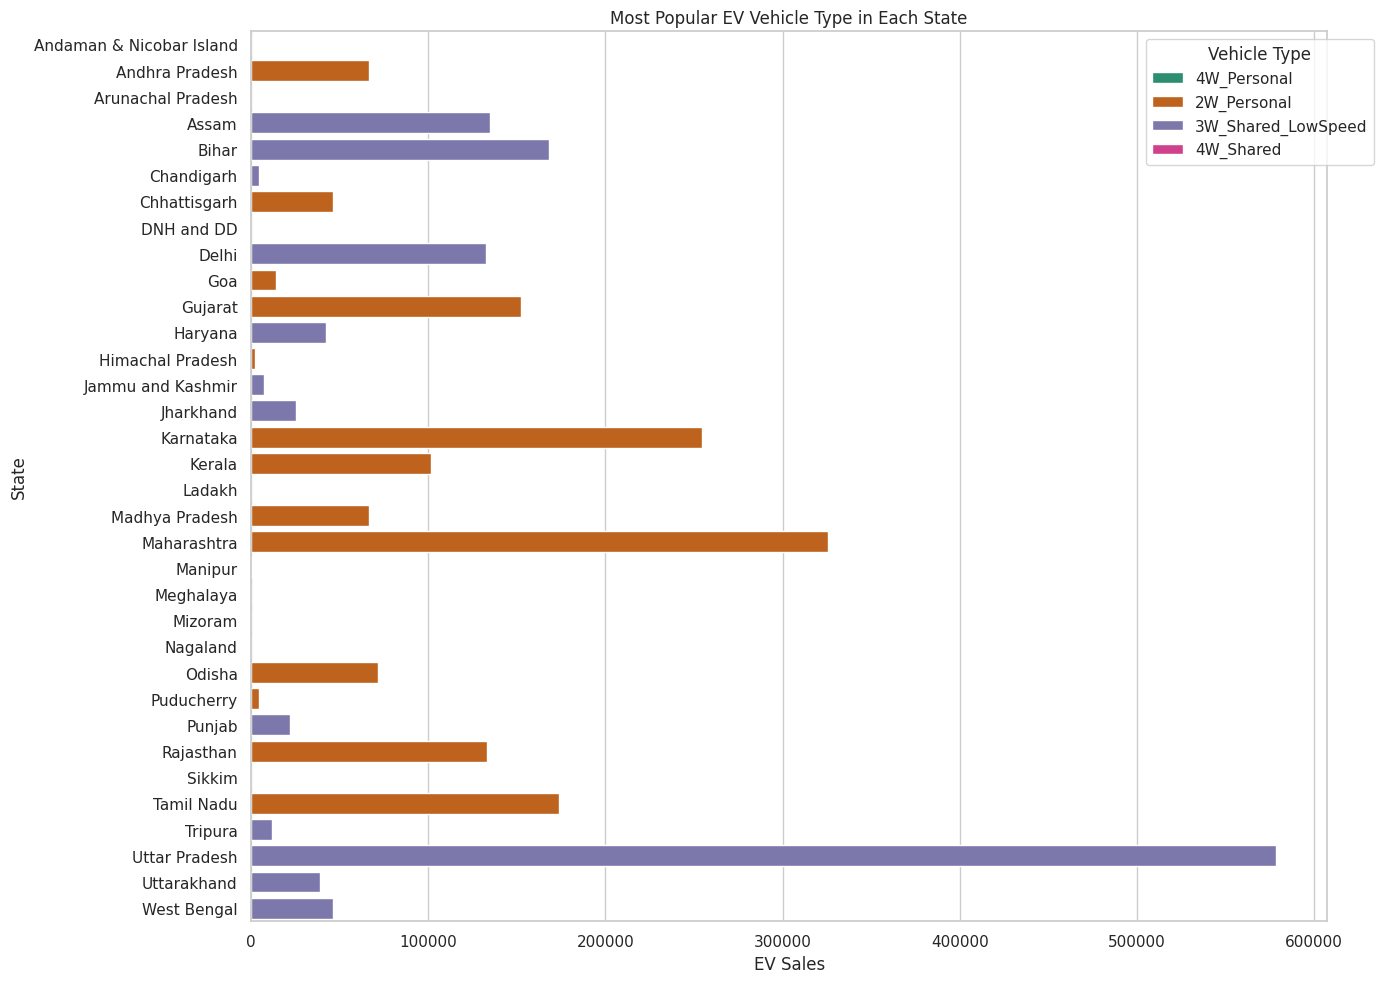

In [ ]:
# Top vehicle type by state visualized

top_type = df_ev.groupby(['state', 'vehicle_type'])['ev_sales_quantity'] \
                .sum().reset_index().sort_values(['state', 'ev_sales_quantity'], ascending=[True, False]) \
                .drop_duplicates('state')

plt.figure(figsize=(14,10))
sns.barplot(data=top_type, x='ev_sales_quantity', y='state', hue='vehicle_type', dodge=False, palette='Dark2')
plt.title("Most Popular EV Vehicle Type in Each State")
plt.xlabel("EV Sales")
plt.ylabel("State")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

 # SECTION C: Temporal Trends by Vehicle Type

Monthly EV Sales Trend Over Time

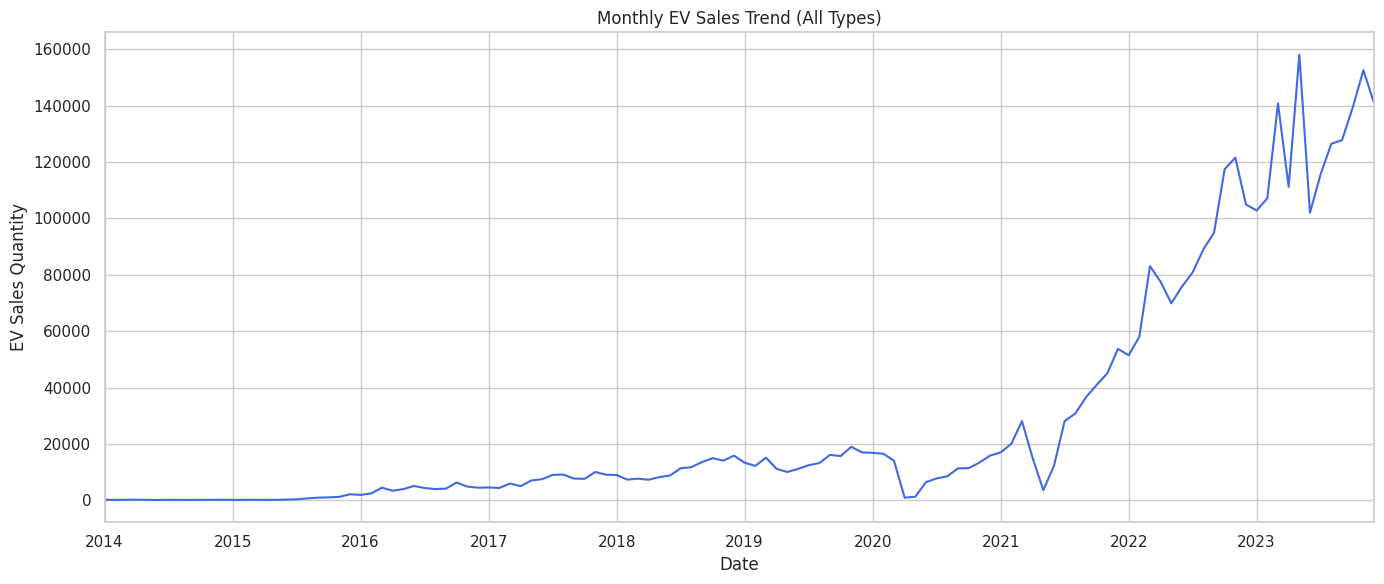

In [ ]:
monthly_trend = df_ev.groupby('date')['ev_sales_quantity'].sum()

plt.figure(figsize=(14,6))
monthly_trend.plot(color='royalblue')
plt.title("Monthly EV Sales Trend (All Types)")
plt.xlabel("Date")
plt.ylabel("EV Sales Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

Monthly EV Sales Trend by Vehicle Type

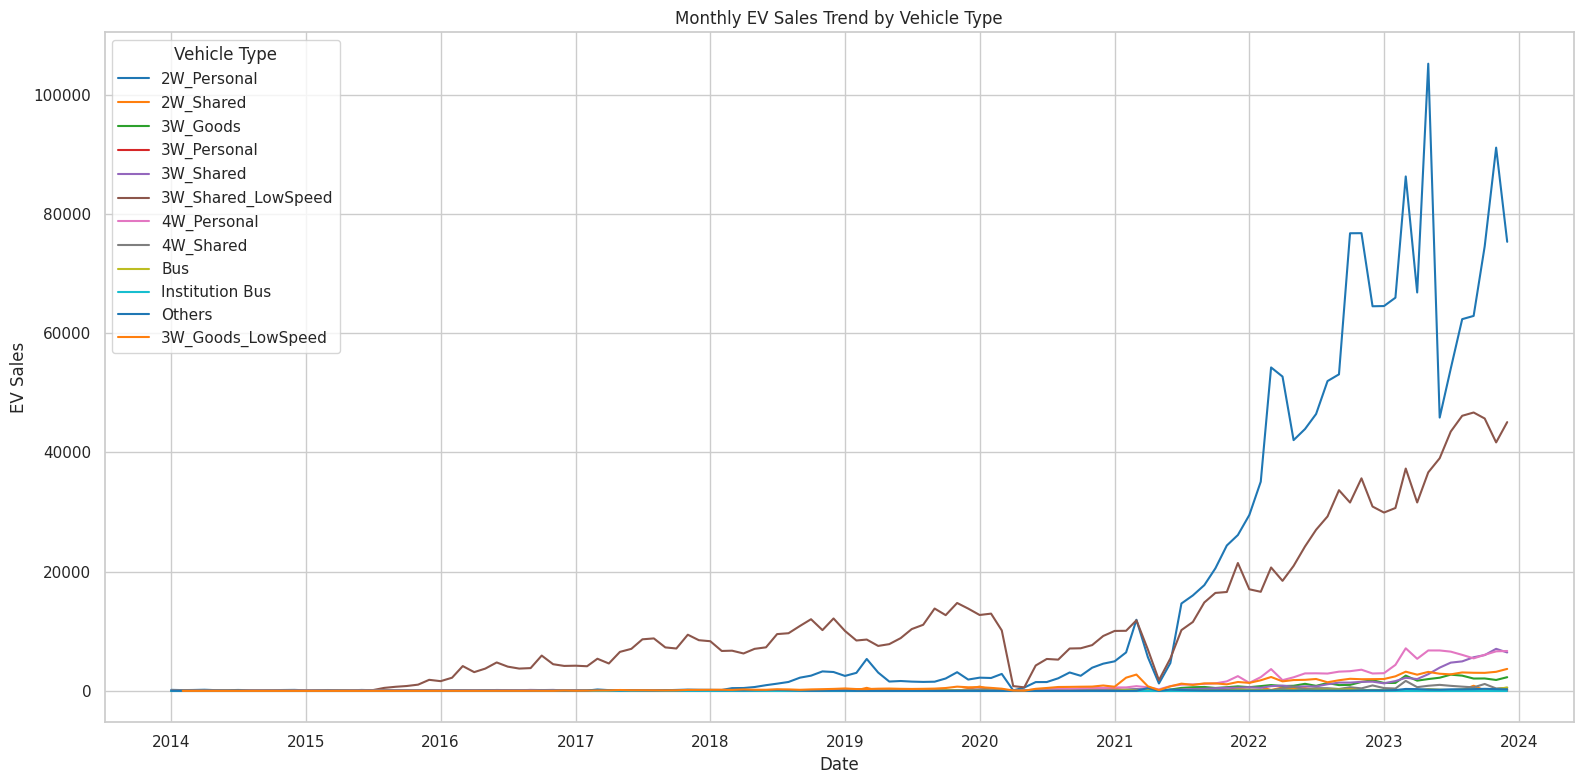

In [ ]:
# Trendlines for major vehicle types

df_ev_grouped = df_ev.groupby(['date', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()

plt.figure(figsize=(16,8))
sns.lineplot(data=df_ev_grouped, x='date', y='ev_sales_quantity', hue='vehicle_type', palette='tab10')
plt.title("Monthly EV Sales Trend by Vehicle Type")
plt.xlabel("Date")
plt.ylabel("EV Sales")
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

Year-wise Total EV Sales Overview

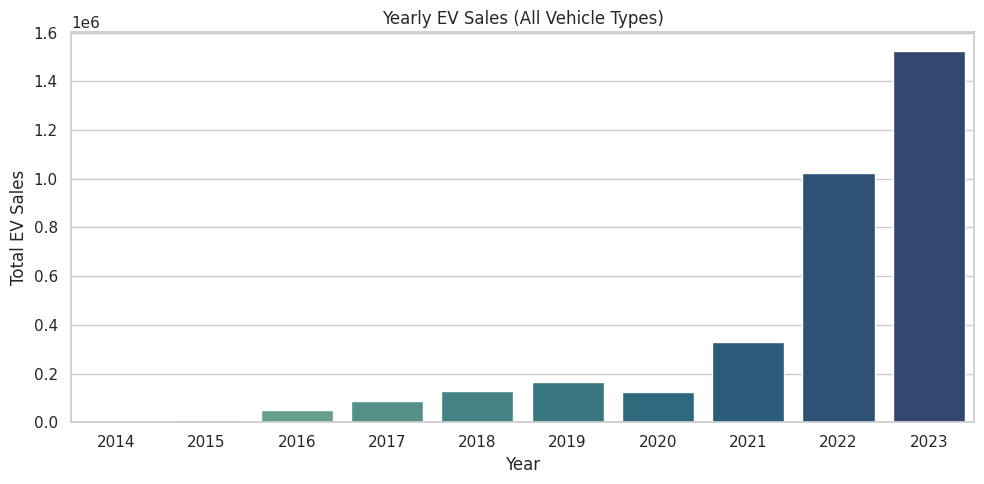

In [ ]:
# Year-wise total EV sales

yearly_sales = df_ev.groupby('year')['ev_sales_quantity'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='crest')
plt.title("Yearly EV Sales (All Vehicle Types)")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.tight_layout()
plt.show()

Yearly EV Sales Trend by Vehicle Type

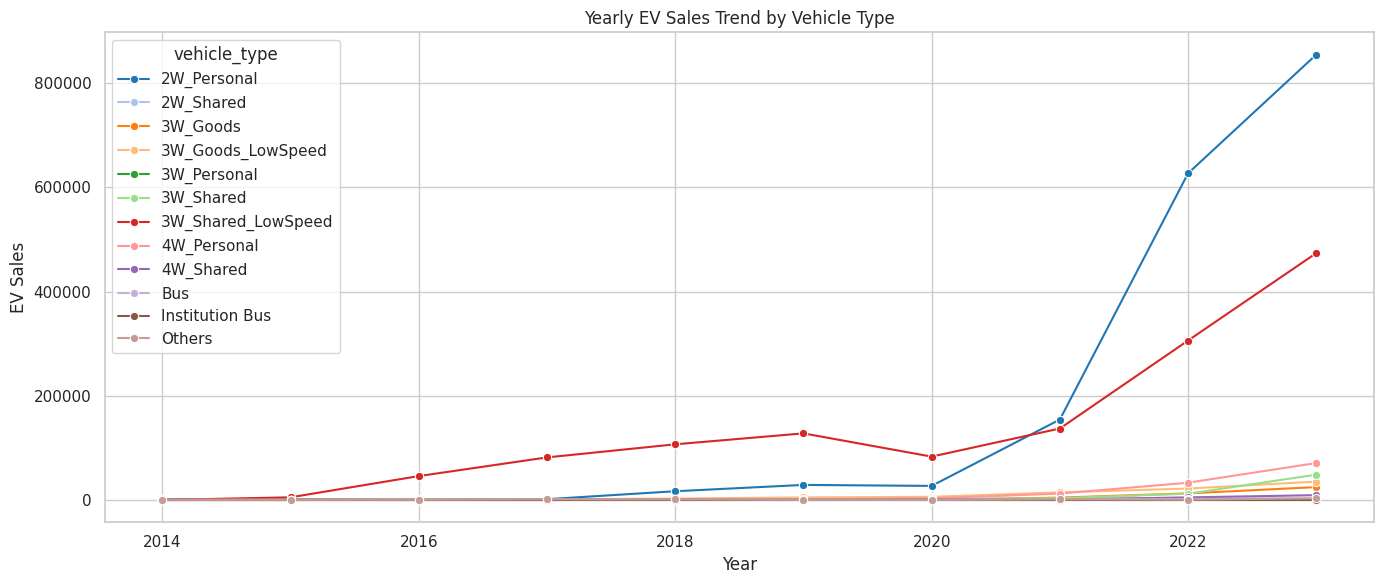

In [ ]:
# Year-wise EV sales by vehicle type

yearly_type_trend = df_ev.groupby(['year', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_type_trend, x='year', y='ev_sales_quantity', hue='vehicle_type', marker='o', palette='tab20')
plt.title("Yearly EV Sales Trend by Vehicle Type")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.tight_layout()
plt.show()

Monthly Average EV Sales by Vehicle Type

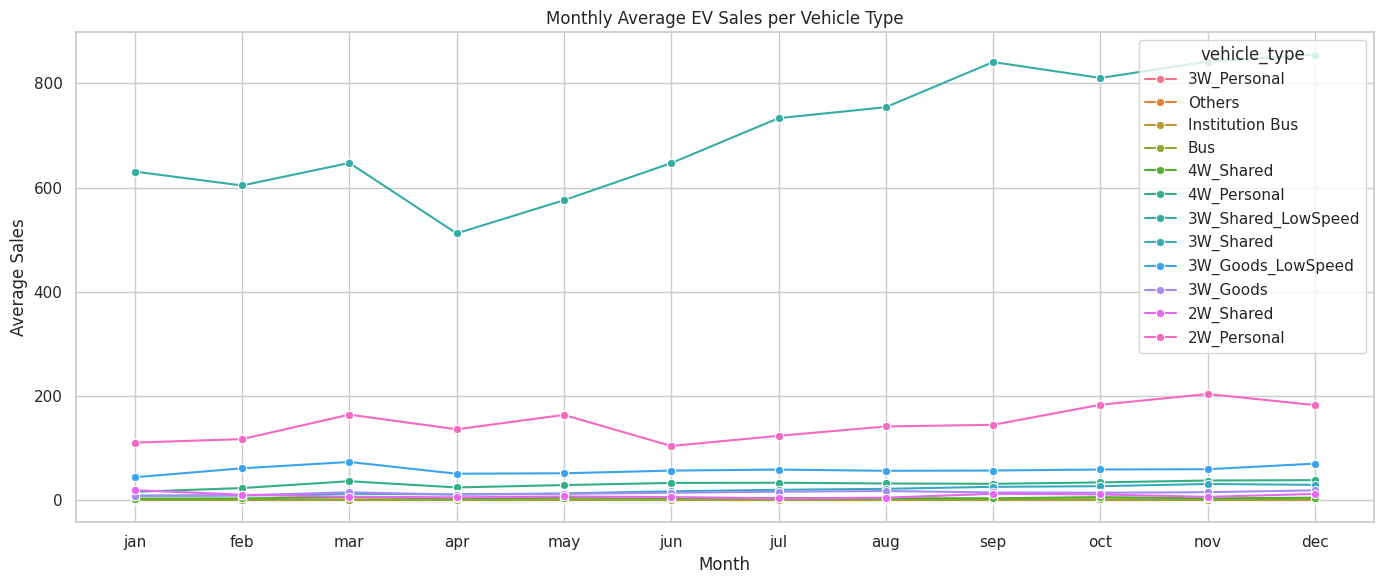

In [ ]:
monthly_avg_type = df_ev.groupby(['month_name', 'vehicle_type'])['ev_sales_quantity'].mean().reset_index()
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monthly_avg_type['month_name'] = pd.Categorical(monthly_avg_type['month_name'], categories=month_order, ordered=True)

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_avg_type.sort_values('month_name'), x='month_name', y='ev_sales_quantity', hue='vehicle_type', marker='o')
plt.title("Monthly Average EV Sales per Vehicle Type")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

3-Month Rolling Average of EV Sales by Vehicle Type

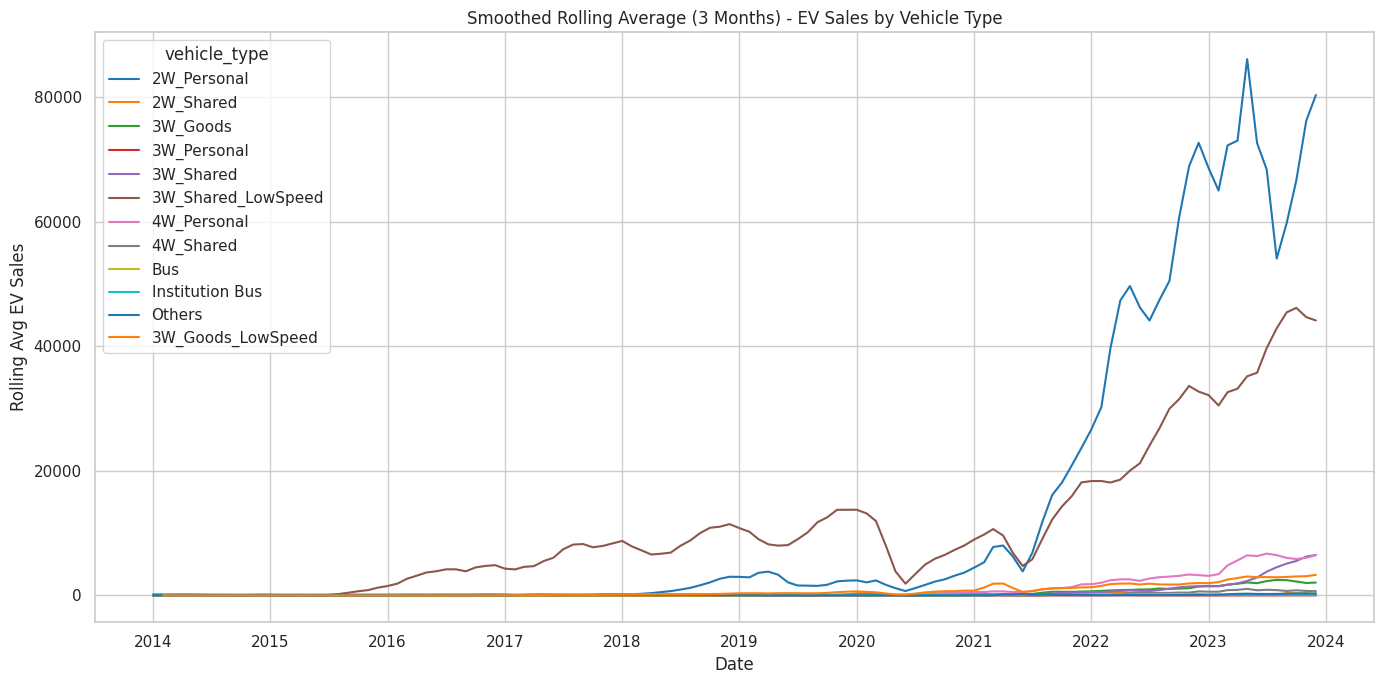

In [ ]:
# Smoothed trend using rolling average (e.g. 3 months)

smoothed = df_ev.groupby(['date', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()
smoothed['rolling_avg'] = smoothed.groupby('vehicle_type')['ev_sales_quantity'].transform(lambda x: x.rolling(3, min_periods=1).mean())

plt.figure(figsize=(14,7))
sns.lineplot(data=smoothed, x='date', y='rolling_avg', hue='vehicle_type', palette='tab10')
plt.title("Smoothed Rolling Average (3 Months) - EV Sales by Vehicle Type")
plt.xlabel("Date")
plt.ylabel("Rolling Avg EV Sales")
plt.tight_layout()
plt.show()

Add Year-Month Column for Time Period Analysis

In [ ]:
# Add year-month column

df_ev['year_month'] = df_ev['date'].dt.to_period('M')
df_ev[['date', 'year_month']].head()

date year_month
0 2014-01-01    2014-01
1 2014-01-01    2014-01
2 2014-01-01    2014-01
3 2014-01-01    2014-01
4 2014-01-01    2014-01

EV Sales Heatmap: Vehicle Type vs Year-Month

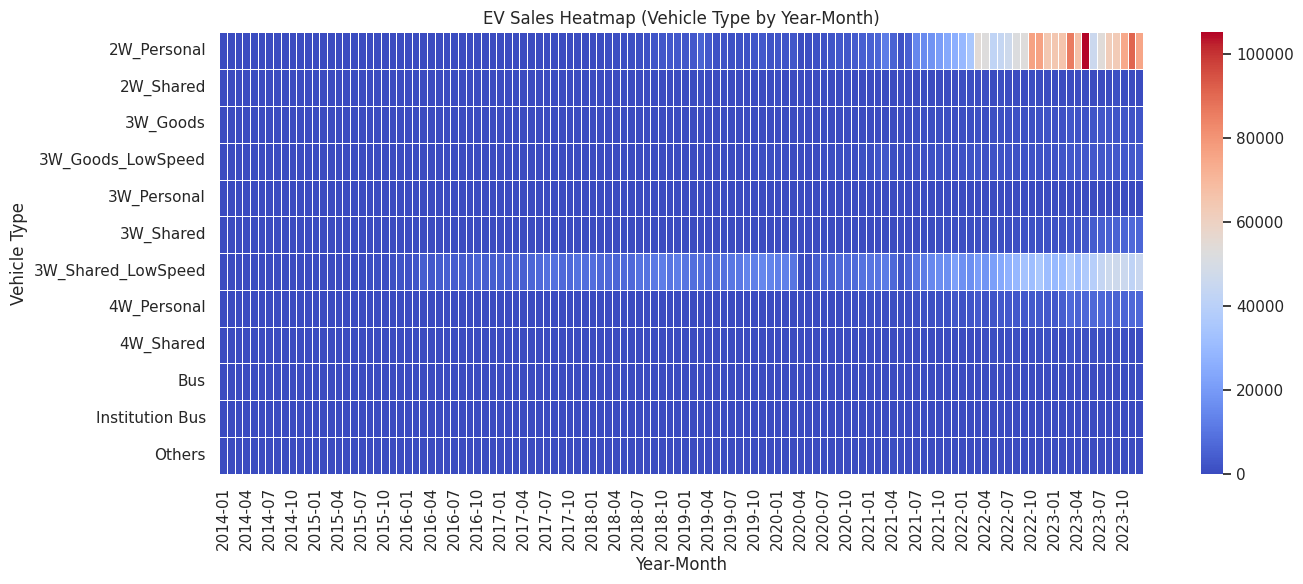

In [ ]:
# Create pivot table for heatmap

pivot = df_ev.pivot_table(index='year_month', columns='vehicle_type', values='ev_sales_quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot.T, cmap='coolwarm', linewidths=.5)
plt.title("EV Sales Heatmap (Vehicle Type by Year-Month)")
plt.xlabel("Year-Month")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

Peak Sales Month per Vehicle Type

In [ ]:
# Peak month for each vehicle type

peak_months = df_ev.groupby(['vehicle_type', 'year_month'])['ev_sales_quantity'].sum().reset_index()
peak_months = peak_months.loc[peak_months.groupby('vehicle_type')['ev_sales_quantity'].idxmax()]
peak_months.sort_values(by='ev_sales_quantity', ascending=False)

vehicle_type year_month  ev_sales_quantity
112          2W_Personal    2023-05             105182
820   3W_Shared_LowSpeed    2023-09              46686
934          4W_Personal    2023-03               7142
703            3W_Shared    2023-11               7055
464    3W_Goods_LowSpeed    2023-12               3687
354             3W_Goods    2023-07               2723
1054           4W_Shared    2023-03               1678
236            2W_Shared    2023-09                863
1183                 Bus    2023-12                577
1390              Others    2021-04                460
563          3W_Personal    2022-03                 32
1184     Institution Bus    2014-01                  0

Time Series Decomposition of Total EV Sales

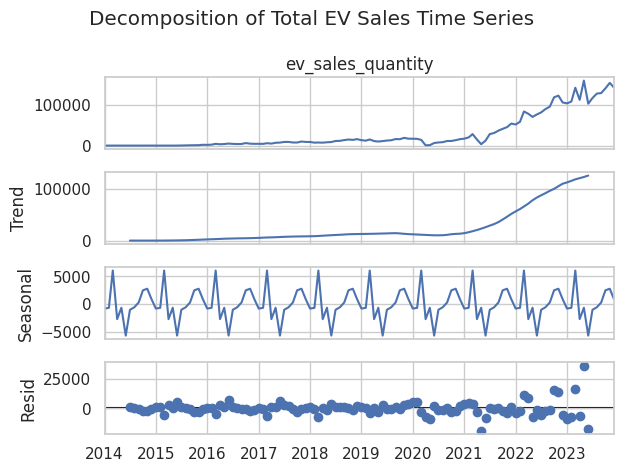

In [ ]:
# Decompose total EV sales trend using statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

total_trend = df_ev.groupby('date')['ev_sales_quantity'].sum().asfreq('MS')

decomposition = seasonal_decompose(total_trend, model='additive')
decomposition.plot()
plt.suptitle("Decomposition of Total EV Sales Time Series")
plt.tight_layout()
plt.show()

# SECTION D: State-Level Insights

Total EV Sales by State

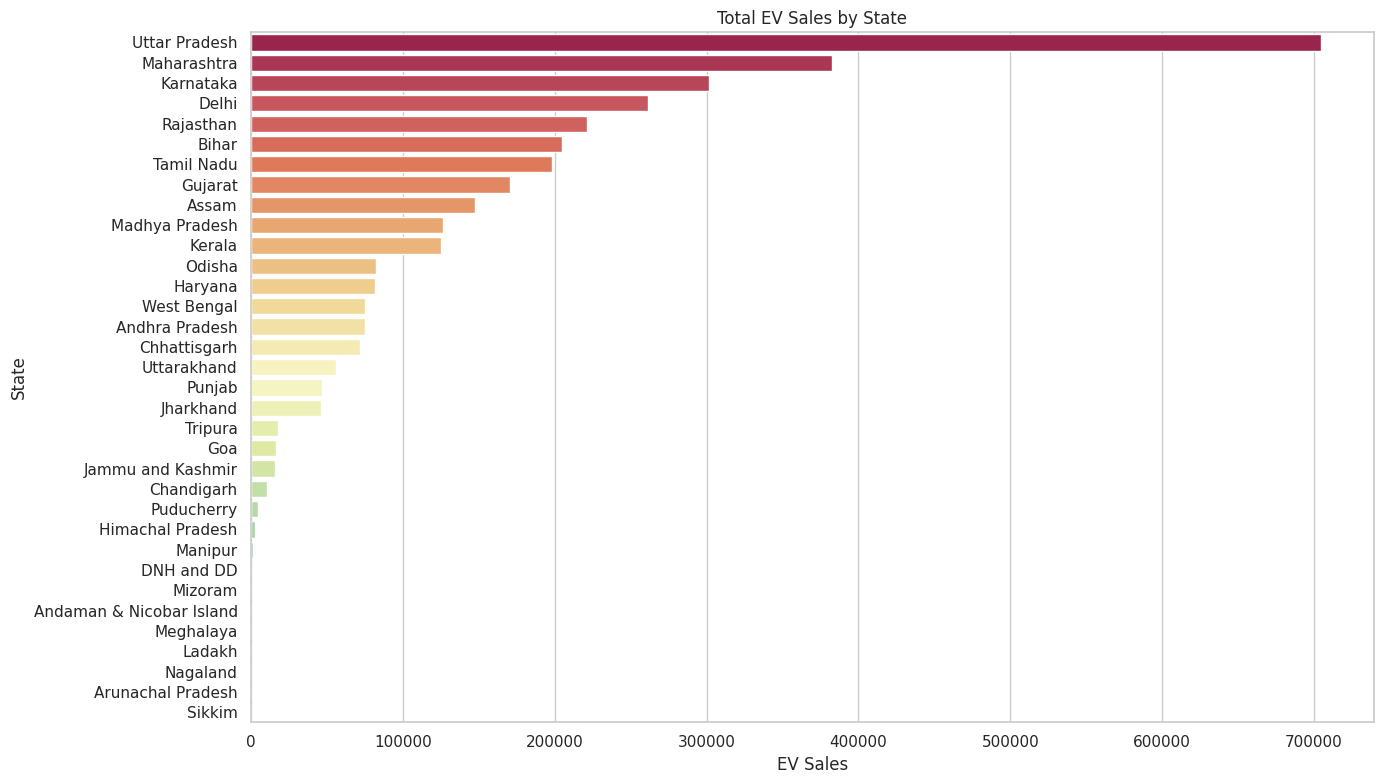

In [ ]:
#Total EV sales by state

state_sales = df_ev.groupby('state')['ev_sales_quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='Spectral')
plt.title("Total EV Sales by State")
plt.xlabel("EV Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Top 10 States by EV Sales

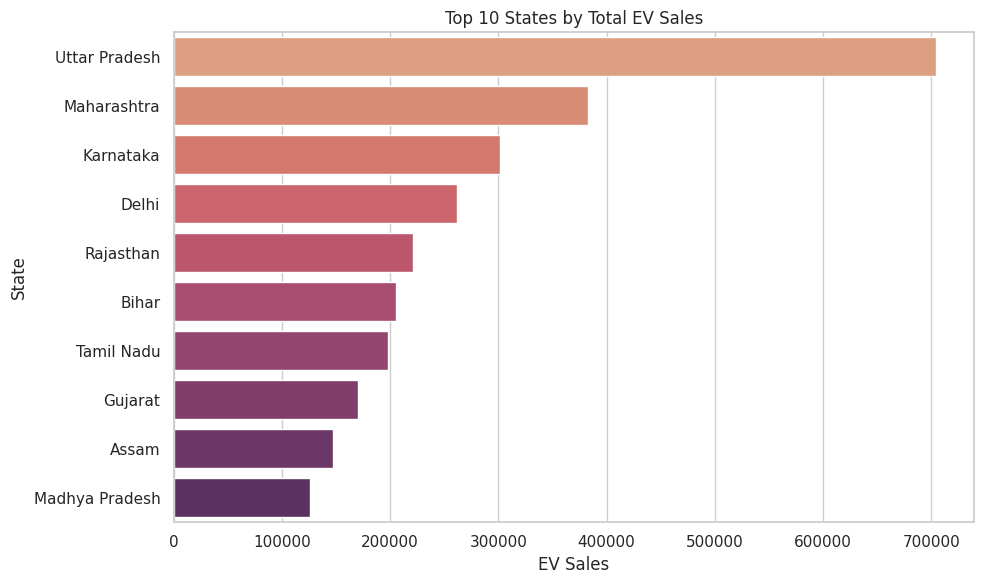

In [ ]:
# Top 10 states by EV sales

top_states = state_sales.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, palette='flare')
plt.title("Top 10 States by Total EV Sales")
plt.xlabel("EV Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

EV Sales Share by Vehicle Type in Top 10 States (Stacked Bar)

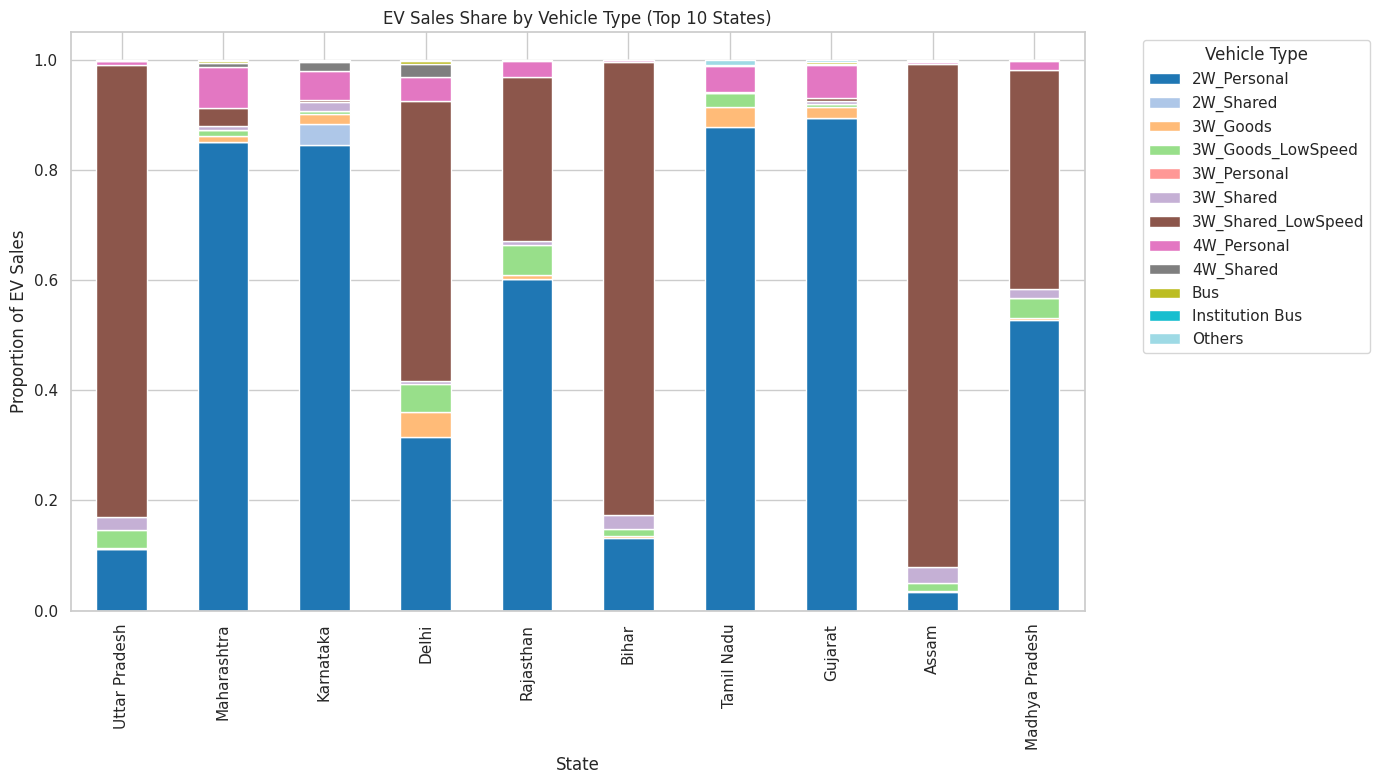

In [ ]:
# Stacked bar of EV sales share by vehicle type per state

state_type = df_ev.groupby(['state', 'vehicle_type'])['ev_sales_quantity'].sum().unstack().fillna(0)
state_type_pct = state_type.div(state_type.sum(axis=1), axis=0)

state_type_pct_sorted = state_type_pct.loc[state_sales.head(10).index]

state_type_pct_sorted.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20')
plt.title("EV Sales Share by Vehicle Type (Top 10 States)")
plt.xlabel("State")
plt.ylabel("Proportion of EV Sales")
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Monthly EV Sales Trends in Key States (Maharashtra, Tamil Nadu, Karnataka)

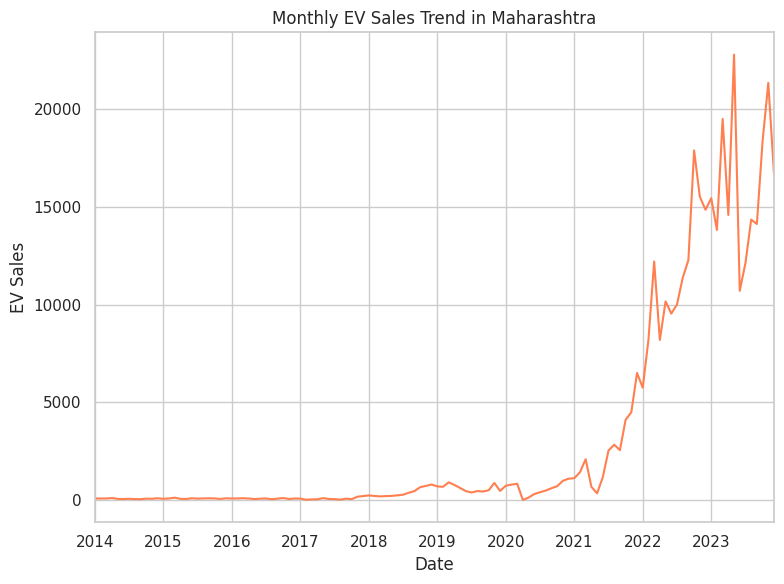

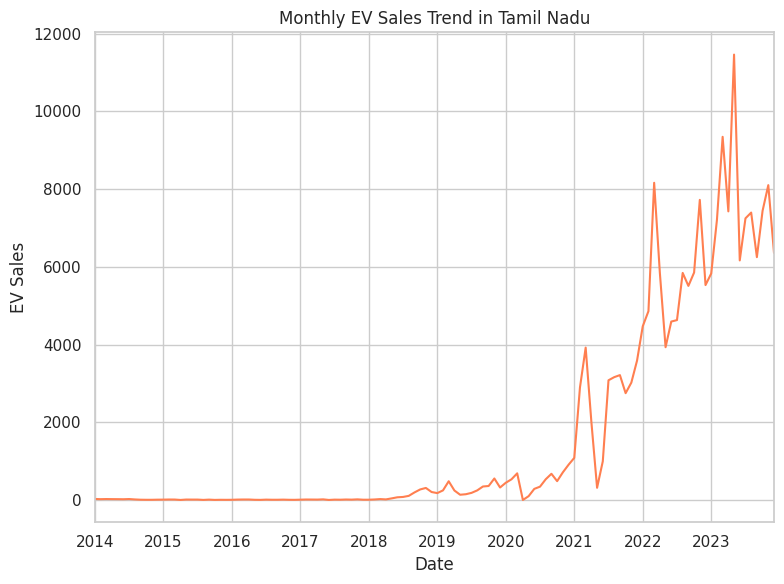

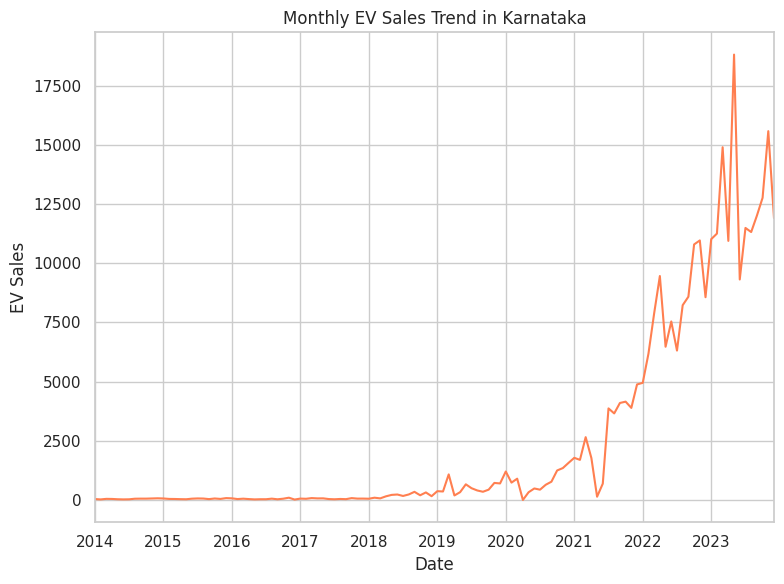

In [ ]:
# Monthly EV sales trend for a specific state

#Maharashtra

state_name = 'Maharashtra'
state_trend = df_ev[df_ev['state'] == state_name].groupby('date')['ev_sales_quantity'].sum()

plt.figure(figsize=(8,6))
state_trend.plot(color='coral')
plt.title(f"Monthly EV Sales Trend in {state_name}")
plt.xlabel("Date")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Tamil Nadu

state_name = 'Tamil Nadu'
state_trend = df_ev[df_ev['state'] == state_name].groupby('date')['ev_sales_quantity'].sum()

plt.figure(figsize=(8,6))
state_trend.plot(color='coral')
plt.title(f"Monthly EV Sales Trend in {state_name}")
plt.xlabel("Date")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

#Karnataka

state_name = 'Karnataka'
state_trend = df_ev[df_ev['state'] == state_name].groupby('date')['ev_sales_quantity'].sum()

plt.figure(figsize=(8,6))
state_trend.plot(color='coral')
plt.title(f"Monthly EV Sales Trend in {state_name}")
plt.xlabel("Date")
plt.ylabel("EV Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

Most Popular EV Vehicle Type Across Indian States

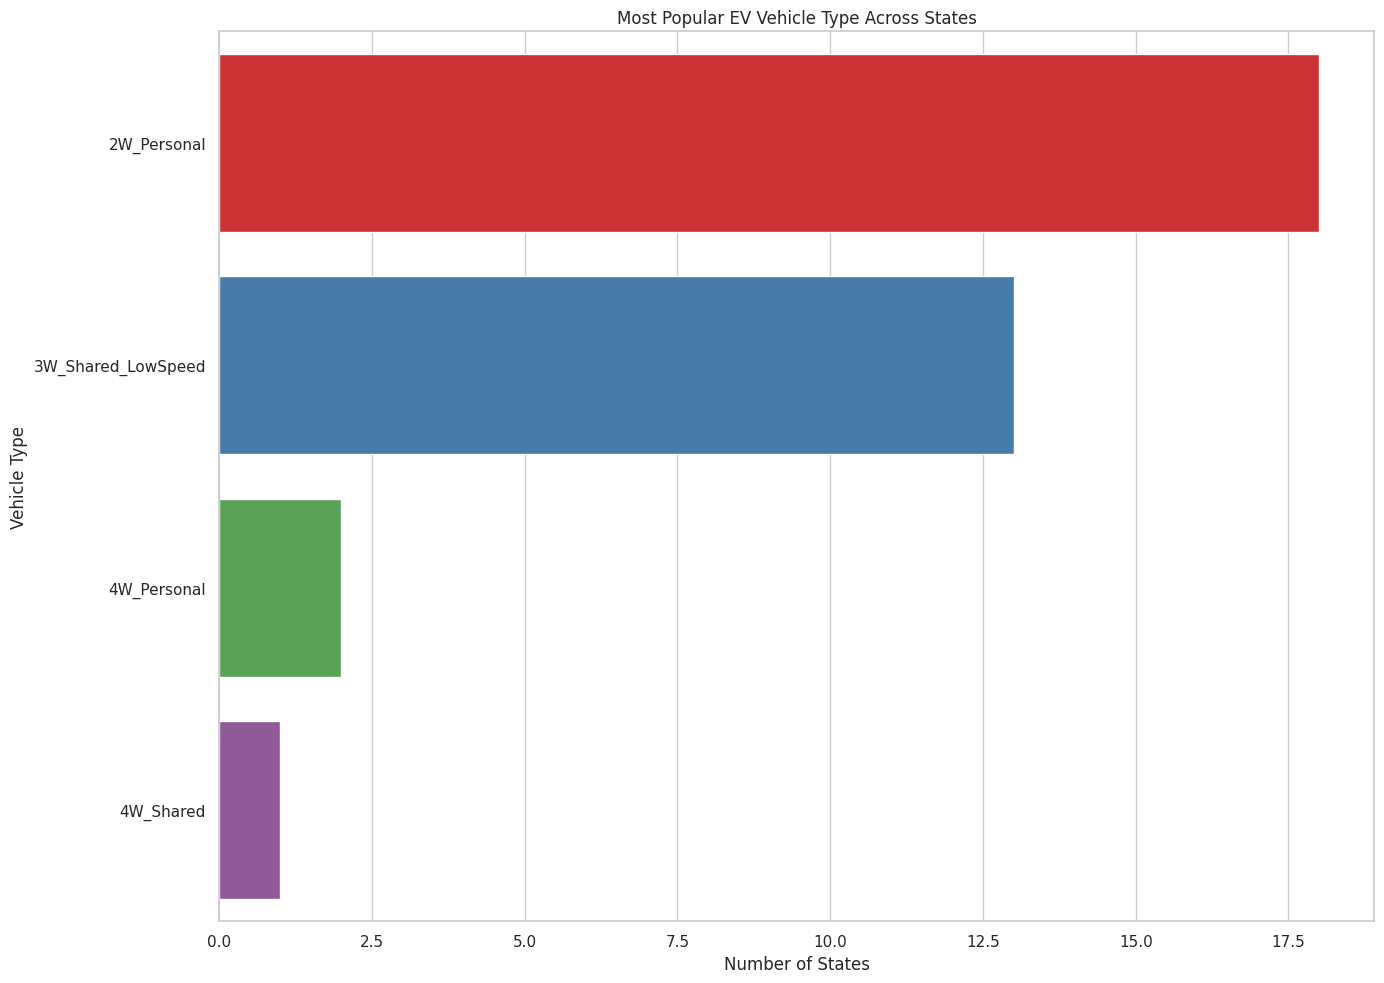

In [ ]:
# Most sold vehicle type per state

popular_type_state = df_ev.groupby(['state', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()
popular_type_state = popular_type_state.sort_values(['state', 'ev_sales_quantity'], ascending=[True, False])
top_type_state = popular_type_state.groupby('state').first().reset_index()

plt.figure(figsize=(14,10))
sns.countplot(data=top_type_state, y='vehicle_type', order=top_type_state['vehicle_type'].value_counts().index, palette='Set1')
plt.title("Most Popular EV Vehicle Type Across States")
plt.xlabel("Number of States")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

Heatmap of EV Sales by Vehicle Class Across States

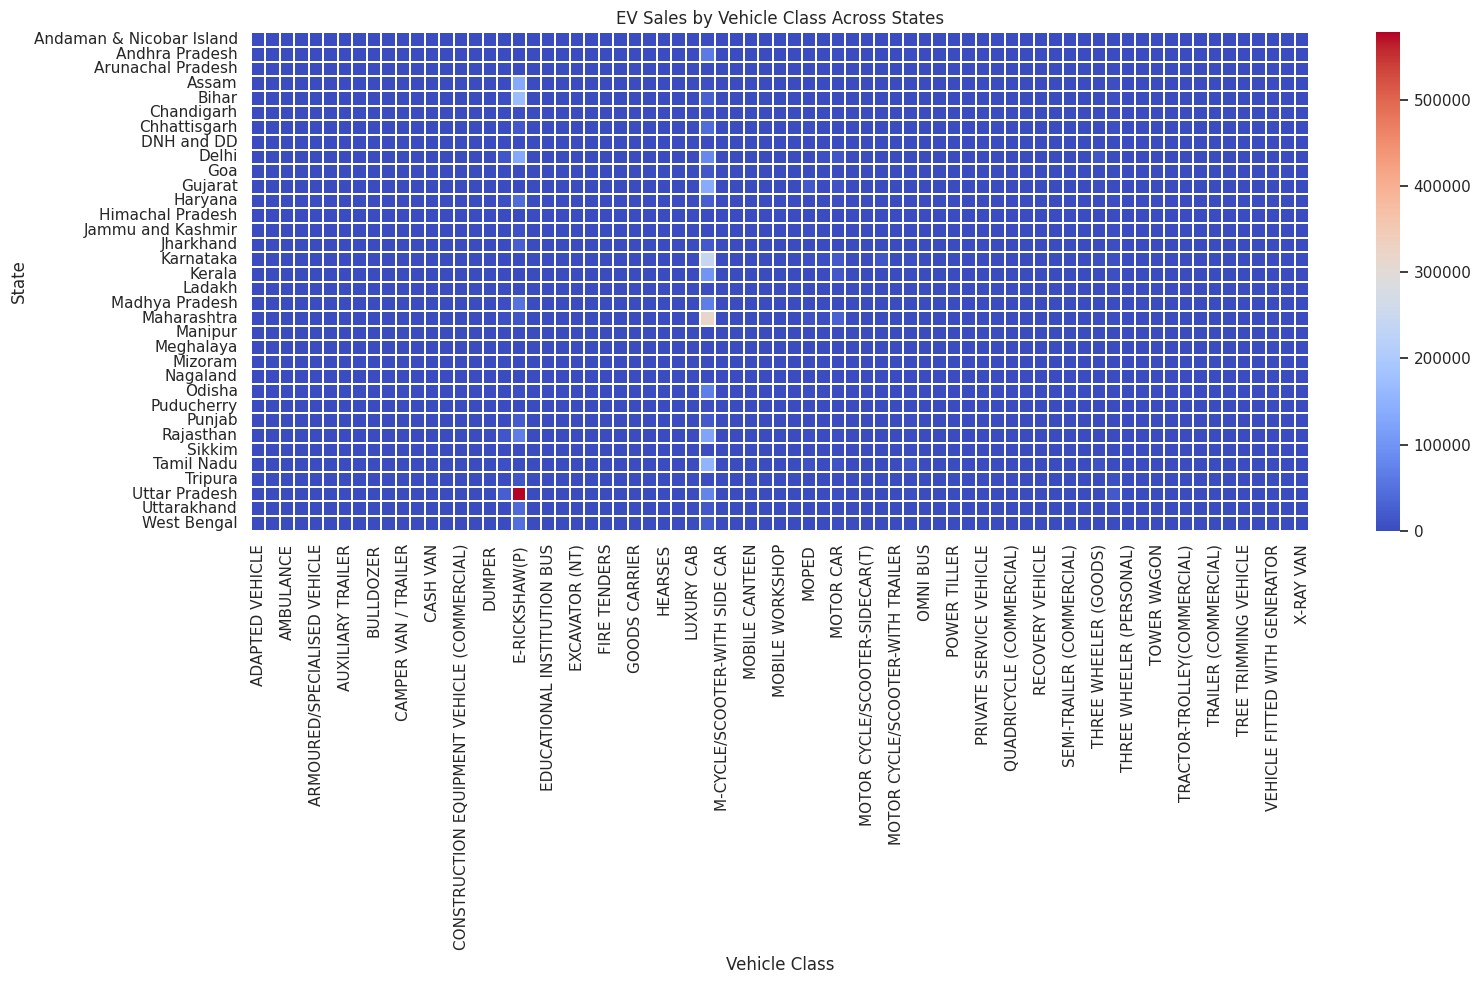

In [ ]:
# Heatmap - Vehicle class across states

pivot_class_state = df_ev.pivot_table(index='state', columns='vehicle_class', values='ev_sales_quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(16,10))
sns.heatmap(pivot_class_state, cmap='coolwarm', linewidths=0.3)
plt.title("EV Sales by Vehicle Class Across States")
plt.xlabel("Vehicle Class")
plt.ylabel("State")
plt.tight_layout()
plt.show()

EV Sales Growth by State (Earliest vs Latest Year)

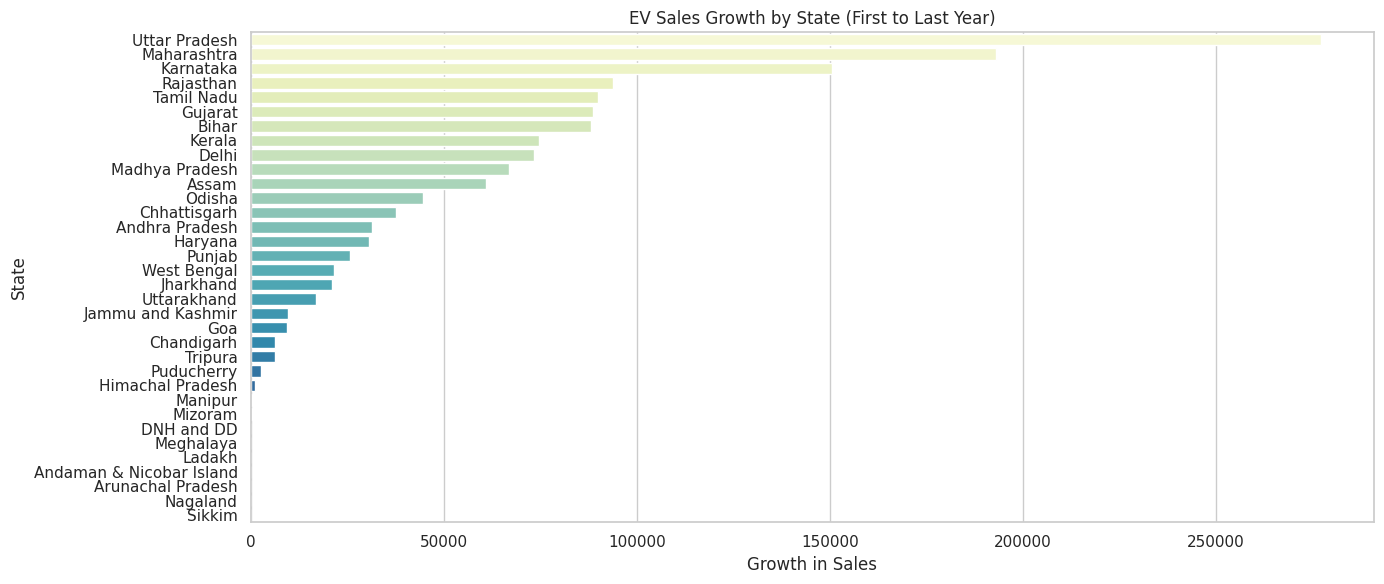

In [ ]:
# Growth rate of EV sales (latest vs earliest year)

sales_year_state = df_ev.groupby(['state', 'year'])['ev_sales_quantity'].sum().unstack(fill_value=0)
sales_year_state['growth'] = sales_year_state[sales_year_state.columns[-1]] - sales_year_state[sales_year_state.columns[0]]
sales_year_state = sales_year_state.sort_values('growth', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=sales_year_state['growth'], y=sales_year_state.index, palette='YlGnBu')
plt.title("EV Sales Growth by State (First to Last Year)")
plt.xlabel("Growth in Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()

State-wise EV Market Diversity by Vehicle Type (Entropy)

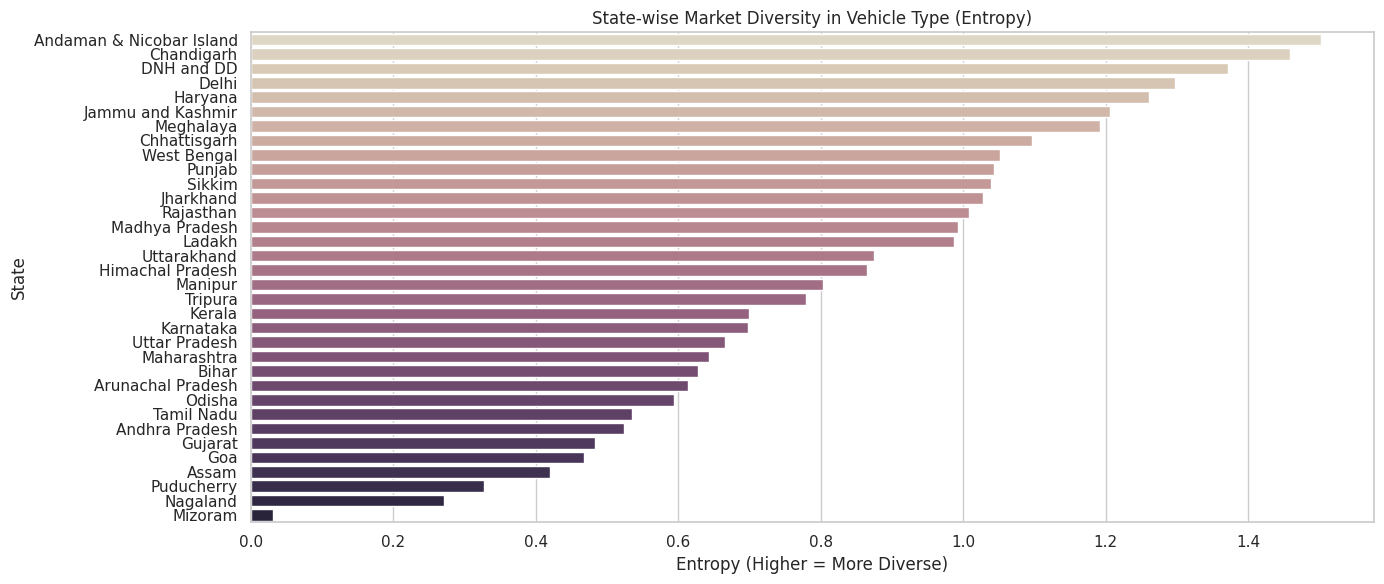

In [ ]:
from scipy.stats import entropy

# Diversity of vehicle types (entropy)

def compute_entropy(x):
    proportions = x / x.sum()
    return entropy(proportions)

entropy_df = df_ev.groupby(['state', 'vehicle_type'])['ev_sales_quantity'].sum().unstack(fill_value=0)
entropy_df['entropy'] = entropy_df.apply(compute_entropy, axis=1)
entropy_sorted = entropy_df['entropy'].sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=entropy_sorted.values, y=entropy_sorted.index, palette='ch:s=-.2,r=.6')
plt.title("State-wise Market Diversity in Vehicle Type (Entropy)")
plt.xlabel("Entropy (Higher = More Diverse)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

Top EV Sales State by Year

In [ ]:
# Top state by EV sales per year

state_year = df_ev.groupby(['year', 'state'])['ev_sales_quantity'].sum().reset_index()
top_state_year = state_year.loc[state_year.groupby('year')['ev_sales_quantity'].idxmax()]
print(top_state_year)

     year          state  ev_sales_quantity
19   2014    Maharashtra                905
42   2015          Delhi               3565
76   2016          Delhi              21688
133  2017  Uttar Pradesh              40649
167  2018  Uttar Pradesh              53212
201  2019  Uttar Pradesh              55796
235  2020  Uttar Pradesh              31264
269  2021  Uttar Pradesh              66702
303  2022  Uttar Pradesh             162857
337  2023  Uttar Pradesh             277300


Heatmap of Year-on-Year EV Sales Change by State

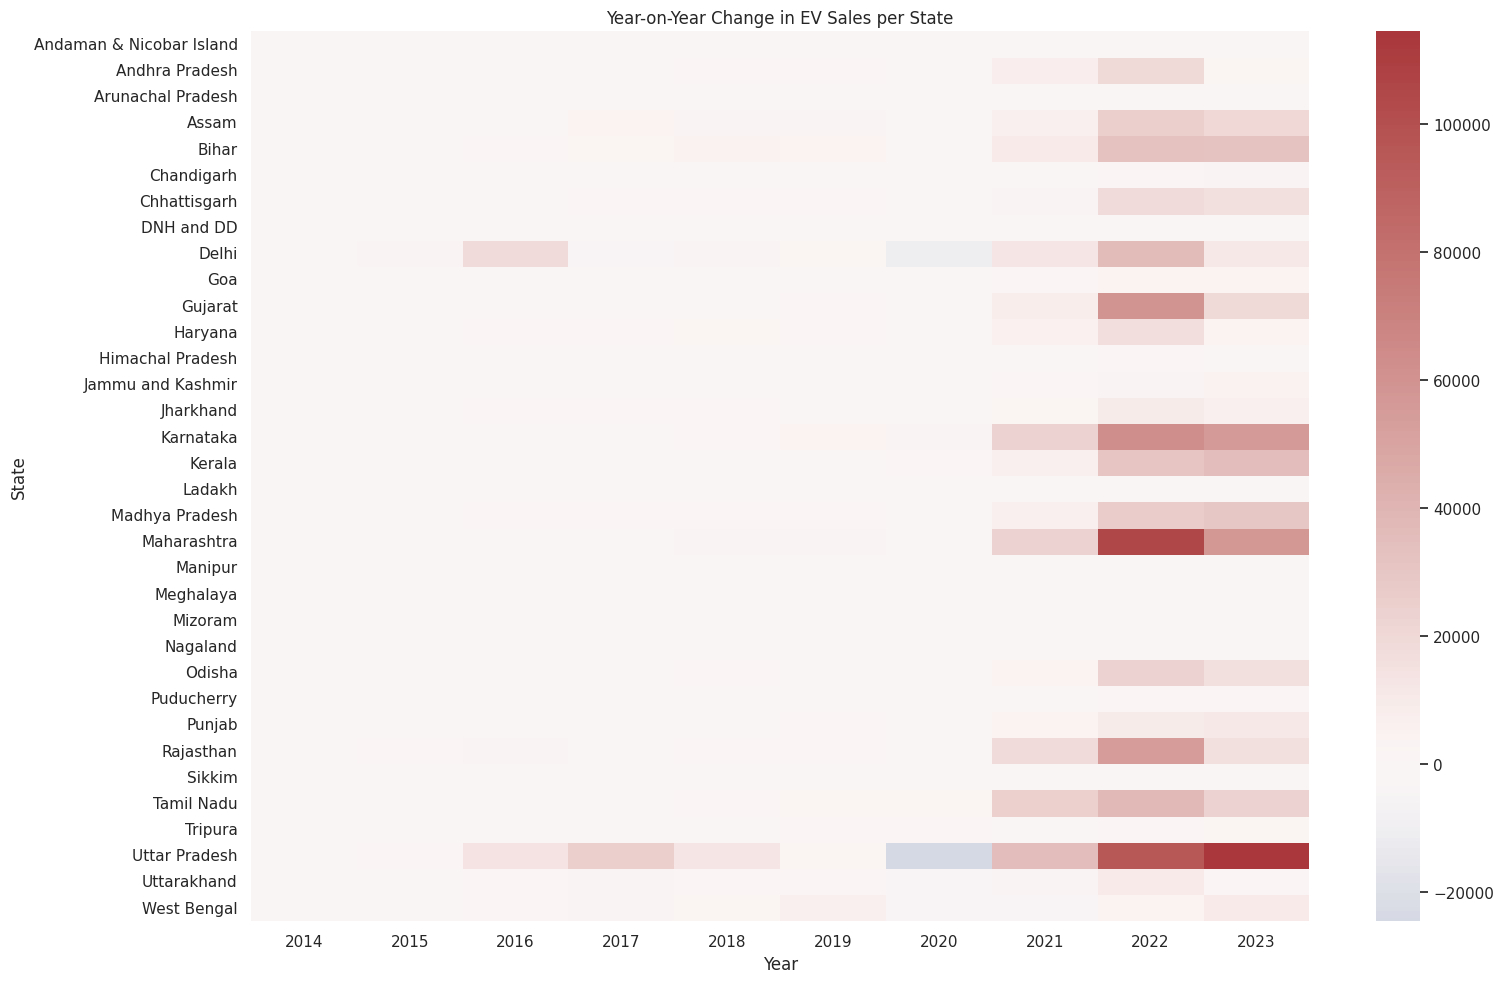

In [ ]:
# Heatmap of YoY changes in state EV sales

state_yoy = df_ev.groupby(['year', 'state'])['ev_sales_quantity'].sum().unstack(fill_value=0)
state_yoy_diff = state_yoy.diff().fillna(0)

plt.figure(figsize=(16,10))
sns.heatmap(state_yoy_diff.T, cmap='vlag', center=0, annot=False)
plt.title("Year-on-Year Change in EV Sales per State")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#SECTION E: Advanced Visualizations & Comparisons

EV Sales Distribution by Vehicle Category (Violin Plot)

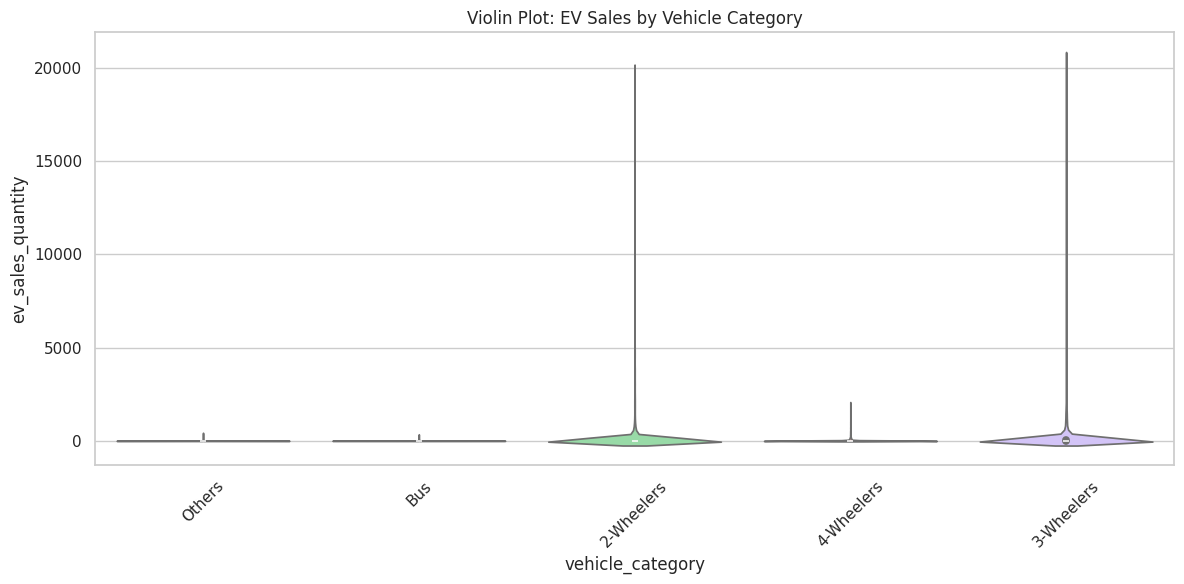

In [ ]:
# Violin plot for EV Sales by Vehicle Category

plt.figure(figsize=(12,6))
sns.violinplot(data=df_ev, x='vehicle_category', y='ev_sales_quantity', palette='pastel')
plt.xticks(rotation=45)
plt.title("Violin Plot: EV Sales by Vehicle Category")
plt.tight_layout()
plt.show()

Empirical CDF of EV Sales by Vehicle Type

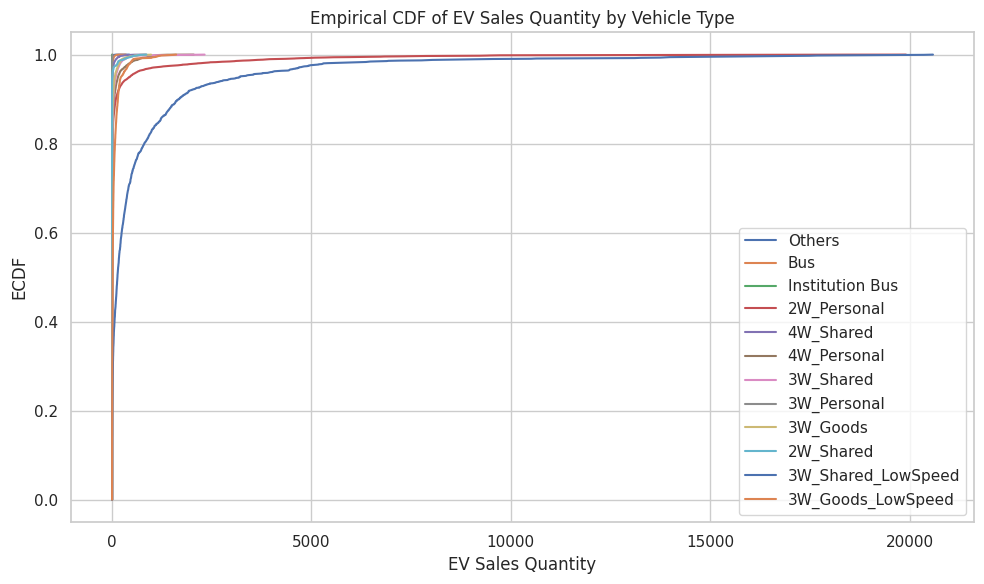

In [ ]:
# ECDF plot by Vehicle Type

from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(10,6))
for vt in df_ev['vehicle_type'].unique():
    ecdf = ECDF(df_ev[df_ev['vehicle_type']==vt]['ev_sales_quantity'])
    plt.plot(ecdf.x, ecdf.y, label=vt)
plt.title("Empirical CDF of EV Sales Quantity by Vehicle Type")
plt.xlabel("EV Sales Quantity")
plt.ylabel("ECDF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Strip Plot of EV Sales by Vehicle Type

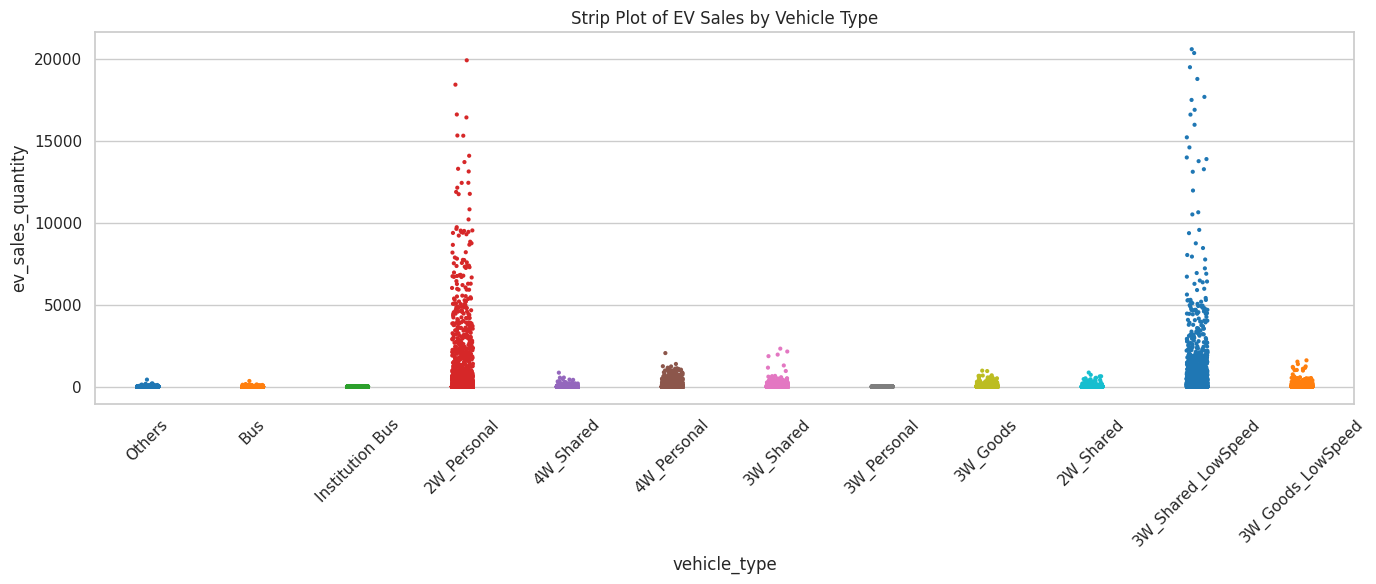

In [ ]:
# Strip plot to visualize dense EV types

plt.figure(figsize=(14,6))
sns.stripplot(data=df_ev, x='vehicle_type', y='ev_sales_quantity', palette='tab10', jitter=True, size=3)
plt.xticks(rotation=45)
plt.title("Strip Plot of EV Sales by Vehicle Type")
plt.tight_layout()
plt.show()

Correlation Heatmap of Numeric Features

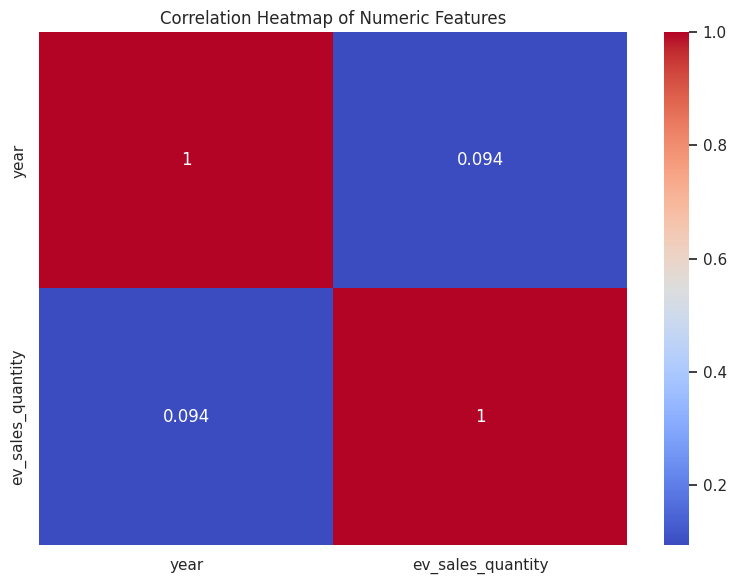

In [ ]:
# Correlation heatmap for numerical features

plt.figure(figsize=(8,6))
sns.heatmap(df_ev.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Top 3 EV Vehicle Types by Year

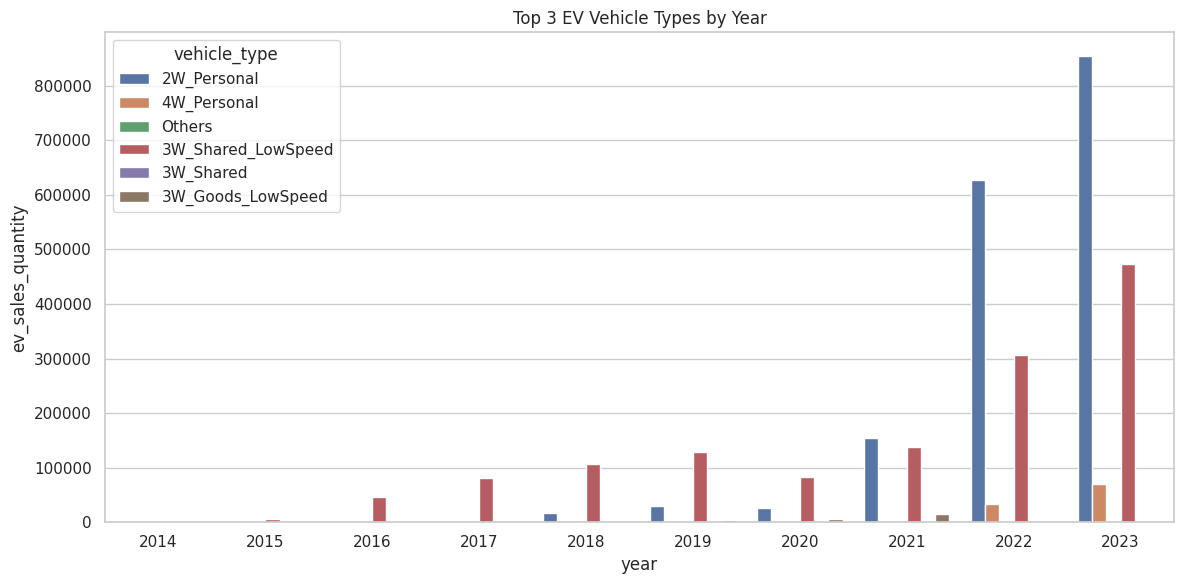

In [ ]:
# Top 3 vehicle types per year

top3_types = df_ev.groupby(['year', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()
top3_types = top3_types.sort_values(['year', 'ev_sales_quantity'], ascending=[True, False])
top3_filtered = top3_types.groupby('year').head(3)

plt.figure(figsize=(12,6))
sns.barplot(data=top3_filtered, x='year', y='ev_sales_quantity', hue='vehicle_type')
plt.title("Top 3 EV Vehicle Types by Year")
plt.tight_layout()
plt.show()

Year-on-Year EV Sales Growth by Vehicle Type

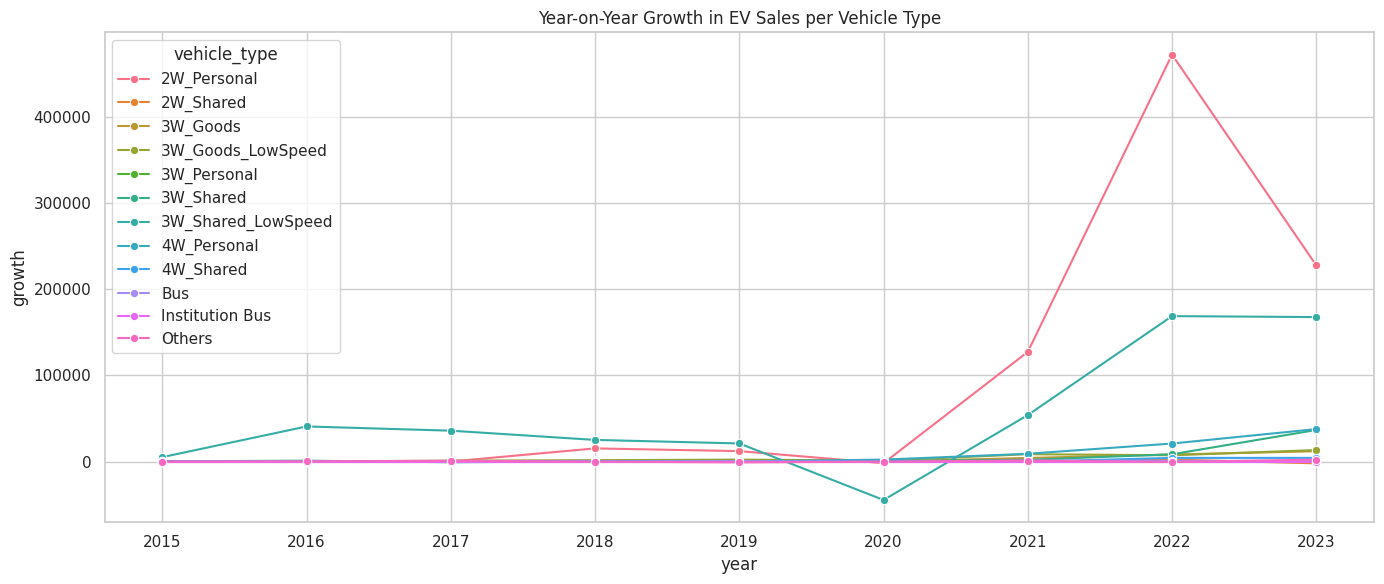

In [ ]:
# Vehicle Type Contribution to Annual Growth

yearly_total = df_ev.groupby(['year', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()
yearly_total['growth'] = yearly_total.groupby('vehicle_type')['ev_sales_quantity'].diff()
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_total, x='year', y='growth', hue='vehicle_type', marker='o')
plt.title("Year-on-Year Growth in EV Sales per Vehicle Type")
plt.tight_layout()
plt.show()

Bubble Plot of EV Sales by Year and Vehicle Type

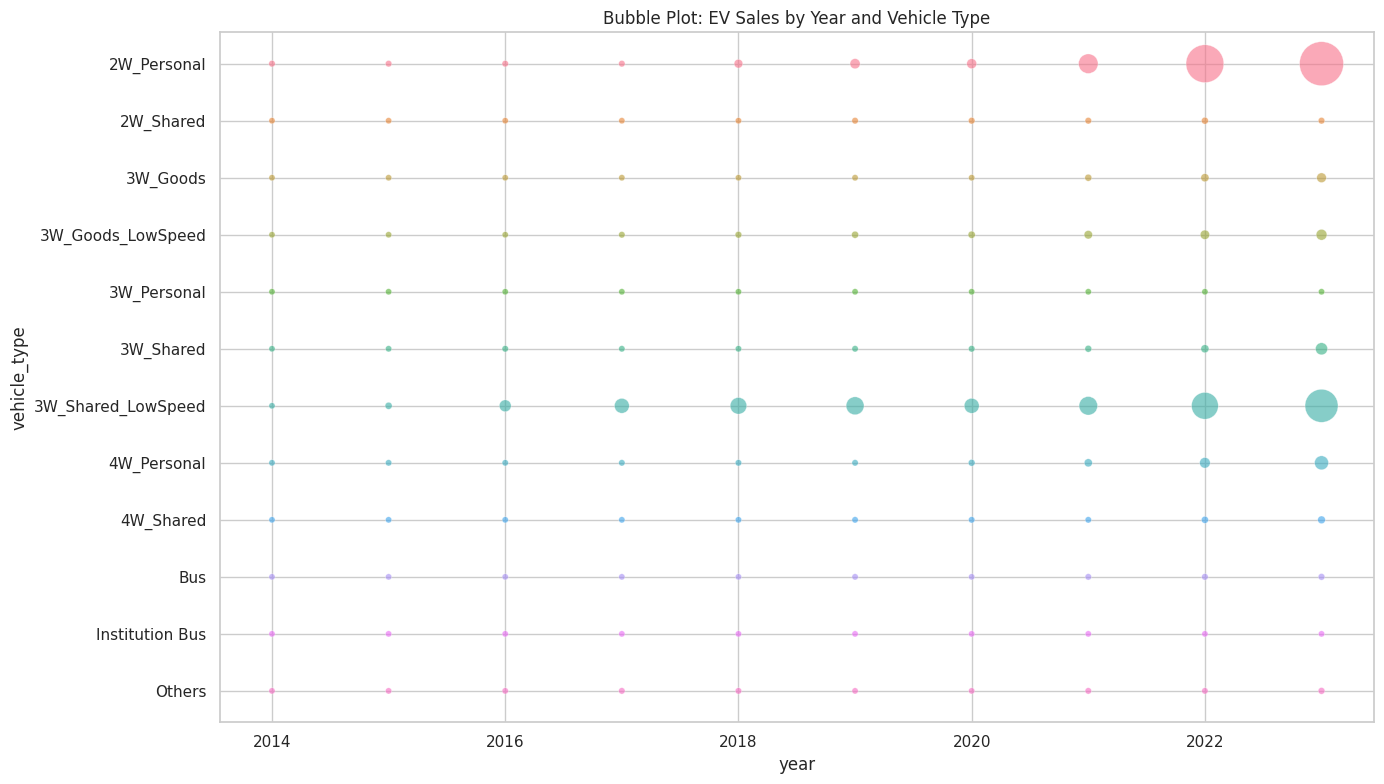

In [ ]:
# Bubble Plot - EV Sales vs Year vs Type

grouped_bubble = df_ev.groupby(['year', 'vehicle_type'])['ev_sales_quantity'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.scatterplot(data=grouped_bubble, x='year', y='vehicle_type', size='ev_sales_quantity', hue='vehicle_type', legend=False, sizes=(20, 1000), alpha=0.6)
plt.title("Bubble Plot: EV Sales by Year and Vehicle Type")
plt.tight_layout()
plt.show()

Hierarchical Sunburst of EV Sales by State, Category, and Type

In [ ]:
# Sunburst-style hierarchical summary

try:
    import plotly.express as px
    fig = px.sunburst(df_ev, path=['state', 'vehicle_category', 'vehicle_type'], values='ev_sales_quantity', title="EV Sales Hierarchy by State → Category → Type")
    fig.show()
except ImportError:
    print("Plotly not installed. Skipping sunburst plot.")

# Final Summary

In [ ]:
print("Summary Insights:")
print("-" * 80)
print(f"Total States: {df_ev['state'].nunique()}")
print(f"Total Vehicle Types: {df_ev['vehicle_type'].nunique()}")
print(f"Time Range: {df_ev['date'].min().date()} to {df_ev['date'].max().date()}")
print(f"Total EVs Sold: {df_ev['ev_sales_quantity'].sum():,}")
print("-" * 80)
print("Top 5 Vehicle Types by Total EV Sales:")
print(df_ev.groupby('vehicle_type')['ev_sales_quantity'].sum().sort_values(ascending=False).head(5))
print("-" * 80)
print("Top 5 States by EV Sales Diversity (Entropy):")
print(entropy_sorted.head(5))

Summary Insights:
--------------------------------------------------------------------------------
Total States: 34
Total Vehicle Types: 12
Time Range: 2014-01-01 to 2023-12-01
Total EVs Sold: 3,450,629
--------------------------------------------------------------------------------
Top 5 Vehicle Types by Total EV Sales:
vehicle_type
2W_Personal           1715037
3W_Shared_LowSpeed    1367735
4W_Personal            124095
3W_Goods_LowSpeed       86921
3W_Shared               69282
Name: ev_sales_quantity, dtype: int64
--------------------------------------------------------------------------------
Top 5 States by EV Sales Diversity (Entropy):
state
Andaman & Nicobar Island    1.501735
Chandigarh                  1.459524
DNH and DD                  1.371752
Delhi                       1.297422
Haryana                     1.261163
Name: entropy, dtype: float64


Feature Engineering and Scaling for Modeling

In [ ]:
# Feature Engineering

df_encoded = pd.get_dummies(df_ev[['state', 'vehicle_category', 'vehicle_class']], drop_first=True)
df_features = pd.concat([df_ev[['year', 'ev_sales_quantity']], df_encoded], axis=1)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# KMeans Clustering

Elbow Method to Determine Optimal Number of Clusters

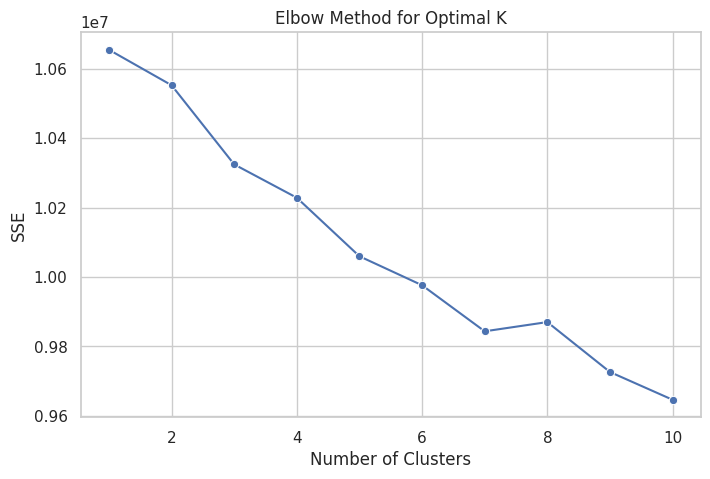

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=sse, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

KMeans Clustering and Cluster-wise Vehicle Type Distribution

In [ ]:
# Final KMeans Model

kmeans = KMeans(n_clusters=4, random_state=42)
df_ev['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# View Cluster Distribution

df_ev.groupby('KMeans_Cluster')['vehicle_type'].value_counts().head(10)

KMeans_Cluster  vehicle_type   
0               Others             3442
                2W_Personal         342
                Bus                 215
                4W_Shared           126
                3W_Goods            120
                3W_Shared           120
                4W_Personal         120
                3W_Personal         119
                Institution Bus     119
                2W_Shared            94
Name: count, dtype: int64

# Gaussian Mixture Models

Gaussian Mixture Clustering and Vehicle Type Breakdown

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
df_ev['GMM_Cluster'] = gmm.fit_predict(X_scaled)

df_ev.groupby('GMM_Cluster')['vehicle_type'].value_counts().head(10)

GMM_Cluster  vehicle_type   
0            Others             18363
             2W_Personal          342
             Bus                  215
             4W_Shared            126
             3W_Goods             120
             3W_Shared            120
             4W_Personal          120
             3W_Personal          119
             Institution Bus      119
             2W_Shared             94
Name: count, dtype: int64

# t-SNE Cluster Visualization

t-SNE Visualization on Sampled EV Data (20%)

In [ ]:
# Sample 20% of the data

df_sample = df_ev.sample(frac=0.20, random_state=42).reset_index(drop=True)

# Re-encode and scale just this sample

df_sample_encoded = pd.get_dummies(df_sample[['state', 'vehicle_category', 'vehicle_class']], drop_first=True)
df_sample_features = pd.concat([df_sample[['year', 'ev_sales_quantity']], df_sample_encoded], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(df_sample_features)

# Run t-SNE safely on this small sample

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample_scaled)

# Add back to sample

df_sample['TSNE_1'] = X_tsne[:, 0]
df_sample['TSNE_2'] = X_tsne[:, 1]

t-SNE Projection with KMeans and GMM Cluster Visualization

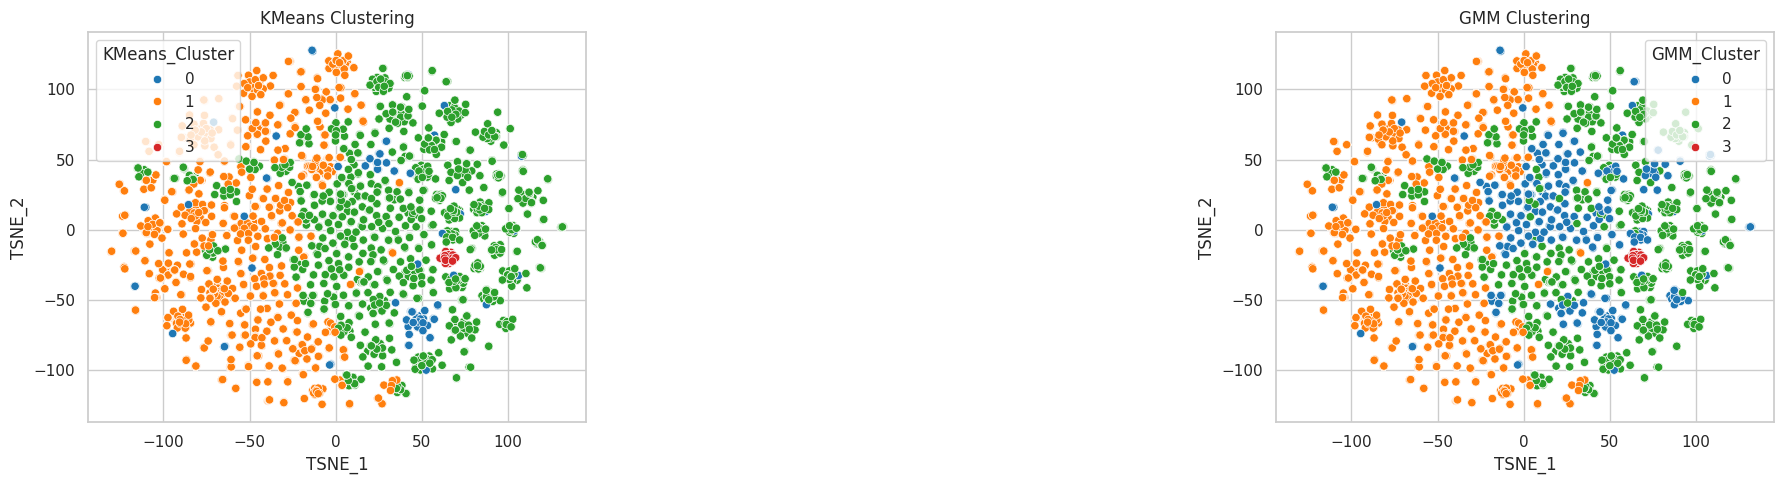

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_sample, x='TSNE_1', y='TSNE_2', hue='KMeans_Cluster', palette='tab10')
plt.title("KMeans Clustering")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_sample, x='TSNE_1', y='TSNE_2', hue='GMM_Cluster', palette='tab10')
plt.title("GMM Clustering")

plt.tight_layout()
plt.show()

Vehicle Type Distribution Across KMeans Clusters

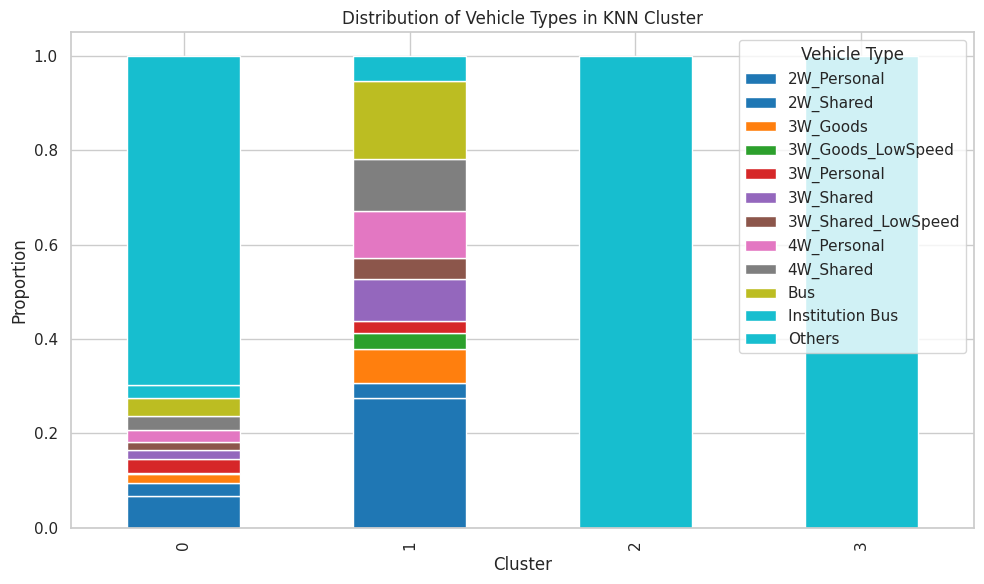

In [ ]:
vehicle_by_cluster = df_sample.groupby('KMeans_Cluster')['vehicle_type'].value_counts(normalize=True).unstack()
vehicle_by_cluster.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))
plt.title("Distribution of Vehicle Types in KNN Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

Vehicle Type Distribution Across GMM Clusters

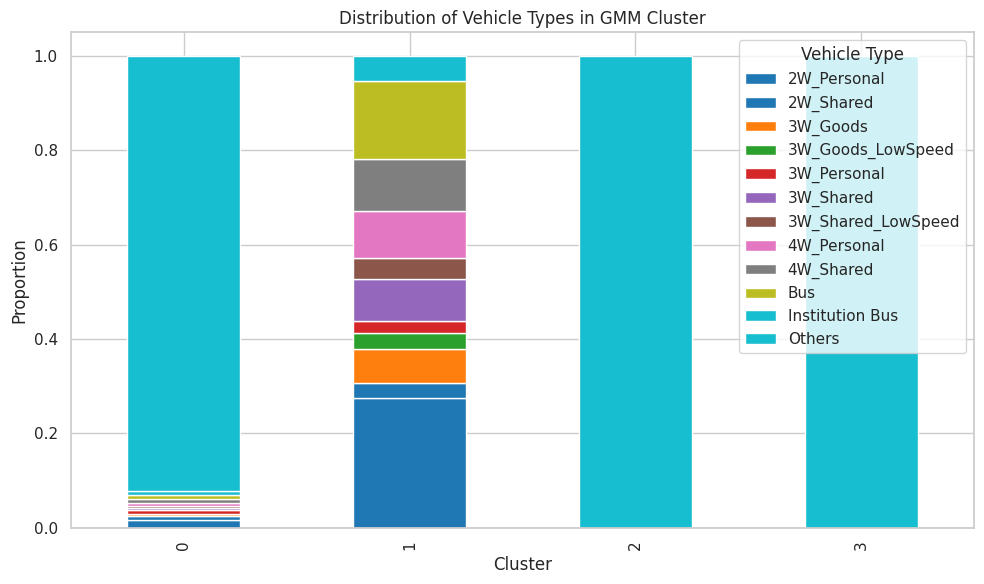

In [ ]:
vehicle_by_cluster = df_sample.groupby('GMM_Cluster')['vehicle_type'].value_counts(normalize=True).unstack()
vehicle_by_cluster.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))
plt.title("Distribution of Vehicle Types in GMM Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

# A Comparative Analysis of 2-Wheeler and 4-Wheeler Electric Vehicles

Load 2-Wheeler and 4-Wheeler EV Datasets

In [ ]:
#Loading the datasets

# 2-Wheeler Dataset

df_2w = pd.read_csv("2-wheeler-EV-bikewale.csv")

# 4-Wheeler Datasets

df_carwale = pd.read_csv("4-wheeler-EV-carwale.csv")
df_cardekho = pd.read_csv("4-wheeler-EV-cardekho.csv")

Preview of 2W and 4W EV Datasets (First Few Rows)

In [ ]:
# View first few rows

df_2w.head(), df_carwale.head(), df_cardekho.head()

(                                              review    Used it for  \
 0  We all checked the bike's capacity to be 150 k...  Daily Commute   
 1  Performance is very poor on this bike. The cha...     Everything   
 2  I purchased this in April 2022 and the sales s...  Daily Commute   
 3  If any issues come in scooty parts not availab...  Daily Commute   
 4  Don't buy this vehicle unless you have a near ...  Daily Commute   
 
        Owned for      Ridden for  rating  Visual Appeal  Reliability  \
 0    Never owned             NaN       1            3.0          4.0   
 1         > 1 yr      < 5000 kms       1            3.0          1.0   
 2     < 3 months      < 5000 kms       3            4.0          4.0   
 3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
 4  6 months-1 yr      < 5000 kms       1            3.0          4.0   
 
    Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
 0          NaN                 NaN         

Dataset Shapes and Column Names Overview

In [ ]:
# Dataset shapes

print(df_2w.shape, df_carwale.shape, df_cardekho.shape)

# Column names

print(df_2w.columns, df_carwale.columns, df_cardekho.columns)

(844, 14) (129, 10) (140, 4)
Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object') Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name'],
      dtype='object') Index(['Review', 'Rating', 'Attributes Mentioned', 'Model'], dtype='object')


Missing Value Summary

In [ ]:
# Missing values

print(df_2w.isnull().sum())
print(df_carwale.isnull().sum())
print(df_cardekho.isnull().sum())

review                 47
Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
dtype: int64
review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64
Review                  0
Rating                  0
Attributes Mentioned    0
Model                   0
dtype: int64


Remove Duplicate Entries

In [ ]:
# Drop duplicates

df_2w.drop_duplicates(inplace=True)
df_carwale.drop_duplicates(inplace=True)
df_cardekho.drop_duplicates(inplace=True)

Descriptive Statistics for 2W and 4W EV Datasets

In [ ]:
# Summary stats

df_2w.describe(include='all')
df_carwale.describe(include='all')
df_cardekho.describe(include='all')

Review      Rating  \
count                                                 140  140.000000   
unique                                                140         NaN   
top     Using it for the last 1 month. It's a gentle-l...         NaN   
freq                                                    1         NaN   
mean                                                  NaN    4.364286   
std                                                   NaN    0.992495   
min                                                   NaN    1.000000   
25%                                                   NaN    4.500000   
50%                                                   NaN    4.500000   
75%                                                   NaN    5.000000   
max                                                   NaN    5.000000   

       Attributes Mentioned          Model  
count                   140            140  
unique                   94              6  
top               ['price']  Tata Nexon EV  
freq                     13             74  
mean                    NaN            NaN  
std                     NaN            NaN  
min                     NaN            NaN  
25%                     NaN            NaN  
50%                     NaN            NaN  
75%                     NaN            NaN  
max                     NaN            NaN

List of Unique EV Models in Each Dataset

In [ ]:
#  Unique models

print(df_2w['Model Name'].unique())
print(df_carwale['model_name'].unique())
print(df_cardekho['Model'].unique())

['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Hero Electric NYX HX' 'Okinawa i-Praise' 'Joy e-bike Monster'
 'PURE EV ETrance Neo' 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal'
 'Hero Electric Atria' 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30'
 'Yo Drift' 'BGauss B8' 'Joy e-bike Wolf' 'Gemopai Astrid Lite'
 'Techo Electra Emerge' 'Techo Electra Raptor' 'e-bike Gen Nxt'
 'Gemopai Ryder']
['hyundai kona' 'tata nexon ev' 'tata tigor ev']
['hyundai kona' 'Kia EV6' 'Tata Nexon EV' 'MG ZS EV' 'Tata Tigor EV'
 'BYD E6']


Ownership Duration and Service Experience Distribution (2W EV Dataset)

In [ ]:
# Value counts (ownership, service)

print(df_2w['Owned for'].value_counts())
print(df_2w['Service Experience'].value_counts())

Owned for
< 3 months            219
> 1 yr                203
Never owned           175
6 months-1 yr         134
3-6 months            111
Occasional Commute      1
Name: count, dtype: int64
Service Experience
5.0    216
1.0    211
4.0    138
3.0     89
2.0     48
Name: count, dtype: int64


Average Ratings Across 2W and 4W EV Datasets

In [ ]:
# Ratings mean

print(df_2w['rating'].mean(), df_carwale['rating'].mean(), df_cardekho['Rating'].mean())

3.361803084223013 4.341085271317829 4.364285714285714


Distribution of Ratings in 2W EV Dataset

In [ ]:
# Count by rating

df_2w['rating'].value_counts().sort_index()

rating
1    239
2     48
3     65
4    151
5    340
Name: count, dtype: int64

Sentiment Analysis and Attribute Extraction from EV Reviews

In [ ]:
# VADER Sentiment

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk; nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df_2w['sentiment'] = df_2w['review'].fillna('').apply(lambda x: sid.polarity_scores(x)['compound'])

# Sentiment Labeling

df_2w['sentiment_label'] = df_2w['sentiment'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')

# Count Sentiment Labels
df_2w['sentiment_label'].value_counts()

# Clean Review Text
df_2w['cleaned_review'] = df_2w['review'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Extract key attributes (Cardekho)
import re
df_cardekho['attributes'] = df_cardekho['Attributes Mentioned'].astype(str).apply(lambda x: re.findall(r"'(.*?)'", x))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Histogram of Ratings in 2W EV Dataset

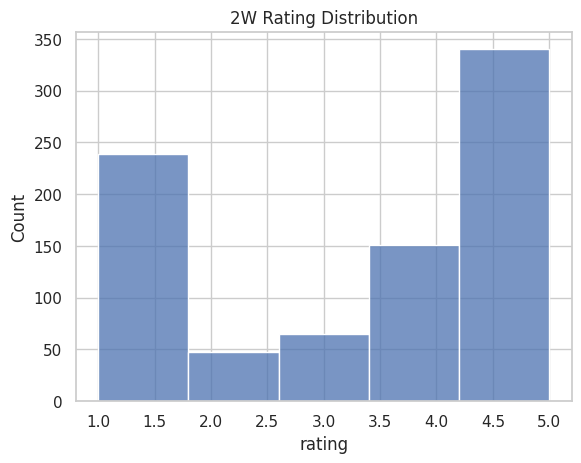

In [ ]:
# Histogram of Ratings

sns.histplot(df_2w['rating'], bins=5)
plt.title("2W Rating Distribution")
plt.show()

Boxplot of Ratings by Ownership Duration (2W EVs)

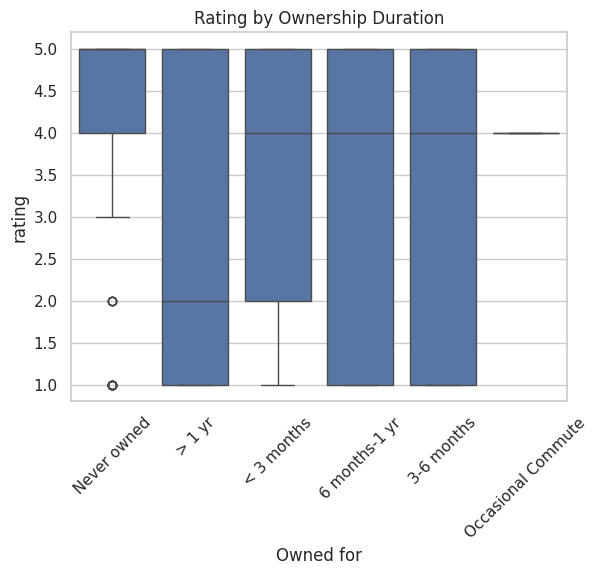

In [ ]:
# Boxplot by Ownership

sns.boxplot(data=df_2w, x='Owned for', y='rating')
plt.xticks(rotation=45)
plt.title("Rating by Ownership Duration")
plt.show()

Service Experience Distribution (Pie Chart)

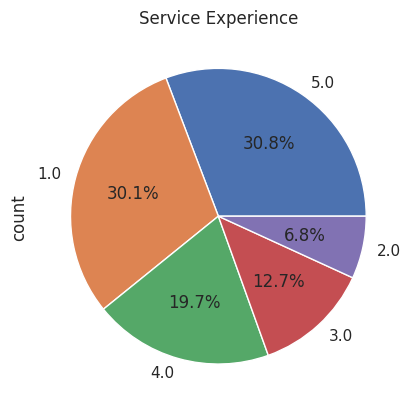

In [ ]:
# Pie chart of Service Experience

df_2w['Service Experience'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Service Experience")
plt.show()

Sentiment Label Distribution in 2W EV Reviews

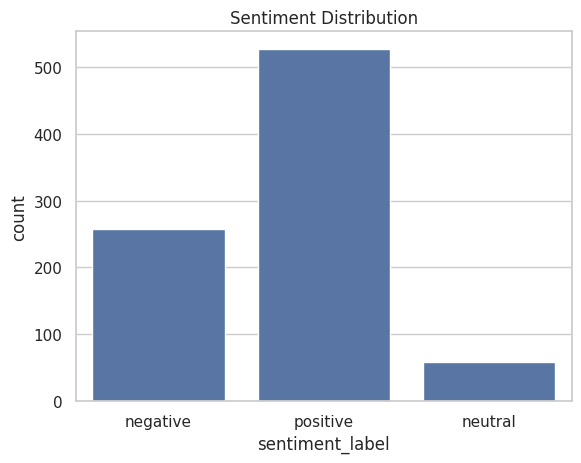

In [ ]:
# Sentiment Countplot

sns.countplot(x='sentiment_label', data=df_2w)
plt.title("Sentiment Distribution")
plt.show()

Scatter Plot: Rating vs Comfort (4W EVs - Carwale)

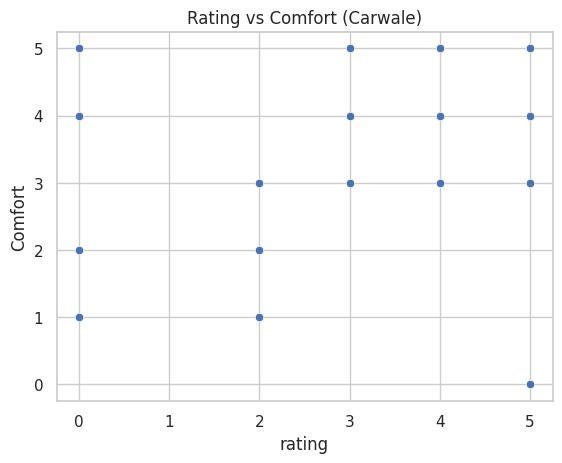

In [ ]:
# Rating vs Comfort

sns.scatterplot(x='rating', y='Comfort', data=df_carwale)
plt.title("Rating vs Comfort (Carwale)")
plt.show()

Word Cloud of 2W EV User Reviews

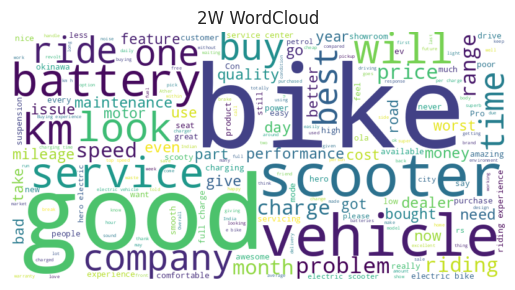

In [ ]:
from wordcloud import WordCloud

# WordCloud for 2W Reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_2w['review'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("2W WordCloud")
plt.show()

Word Cloud of 4W EV User Reviews (Carwale)

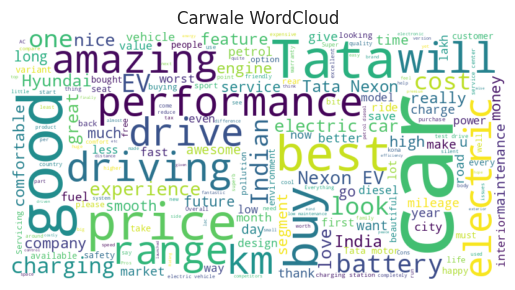

In [ ]:
# WordCloud for Carwale

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_carwale['review'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Carwale WordCloud")
plt.show()

Text-Based Market Segmentation via Review Clustering (2W & 4W EVs)


🔹 Processing 2-Wheeler (Bikewale)...


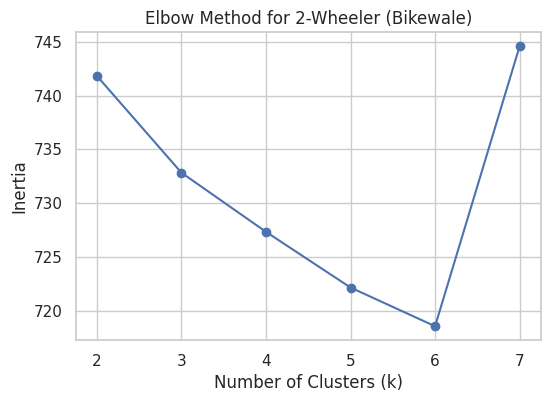

Cluster counts:
segment
1    331
0    305
2    207
Name: count, dtype: int64


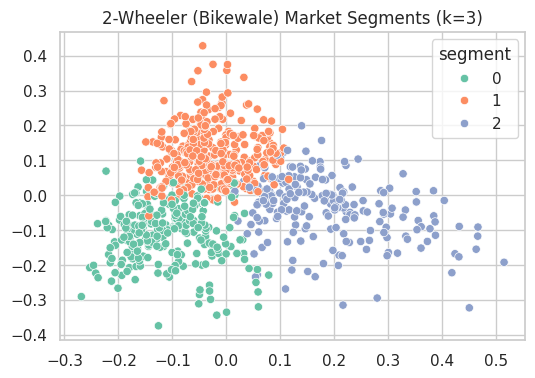


🔹 Processing 4-Wheeler (Carwale)...


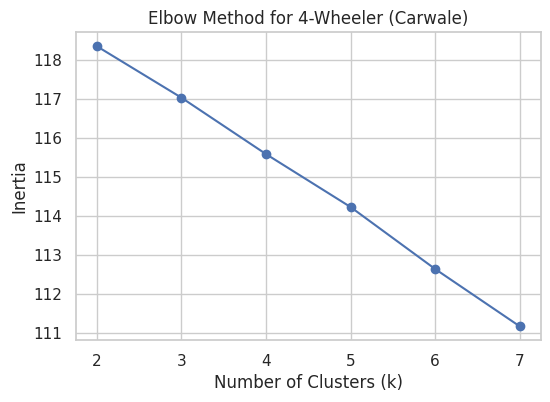

Cluster counts:
segment
1    86
0    29
2    14
Name: count, dtype: int64


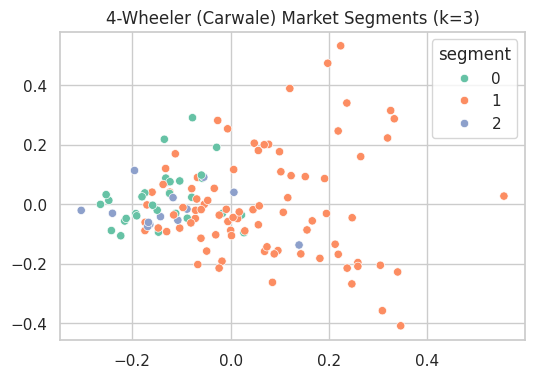


🔹 Processing 4-Wheeler (Cardekho)...


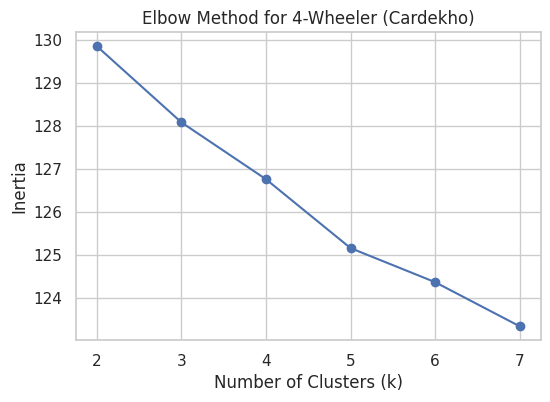

Cluster counts:
segment
1    61
0    43
2    36
Name: count, dtype: int64


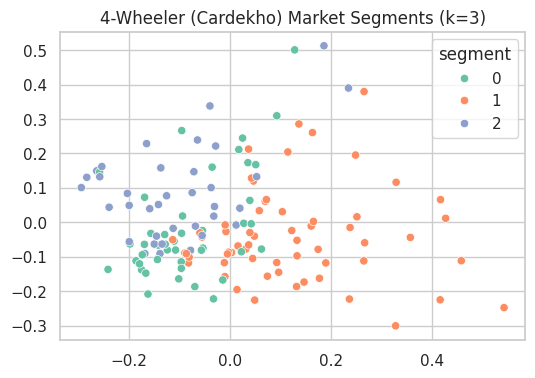

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def cluster_reviews(df, review_col, dataset_name):
    print(f"\n🔹 Processing {dataset_name}...")

    # TF-IDF vectorization
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    X = tfidf.fit_transform(df[review_col].fillna(""))

    # Elbow Method to find optimal K
    distortions = []
    K = range(2, 8)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {dataset_name}')
    plt.show()

    # Choose optimal K (manually or heuristically, here assume k=3 as example)
    optimal_k = 3

    # Final KMeans
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
    df['segment'] = kmeans_final.fit_predict(X)

    # Print cluster counts
    print("Cluster counts:")
    print(df['segment'].value_counts())

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['segment'], palette='Set2')
    plt.title(f"{dataset_name} Market Segments (k={optimal_k})")
    plt.show()

    return df

# Run for all datasets
df_2w = cluster_reviews(df_2w, 'review', '2-Wheeler (Bikewale)')
df_carwale = cluster_reviews(df_carwale, 'review', '4-Wheeler (Carwale)')
df_cardekho = cluster_reviews(df_cardekho, 'Review', '4-Wheeler (Cardekho)')

Average Rating Comparison and Sentiment by Market Segment (2W)

2W avg: 3.361803084223013
4W (Carwale) avg: 4.341085271317829
4W (Cardekho) avg: 4.364285714285714


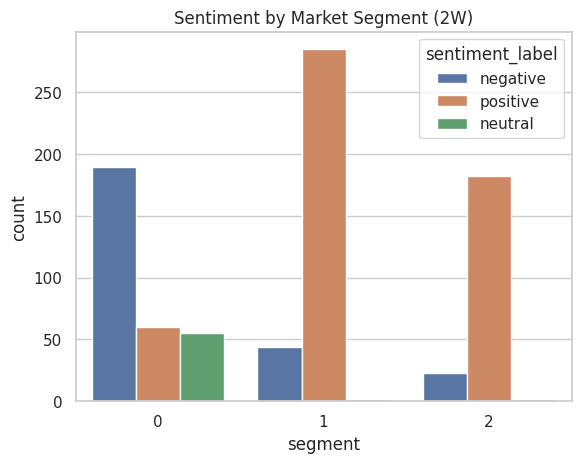

In [ ]:
# Compare average rating by vehicle type

print("2W avg:", df_2w['rating'].mean())
print("4W (Carwale) avg:", df_carwale['rating'].mean())
print("4W (Cardekho) avg:", df_cardekho['Rating'].mean())

# Sentiment by Segment

sns.countplot(x='segment', hue='sentiment_label', data=df_2w)
plt.title("Sentiment by Market Segment (2W)")
plt.show()

Cluster-wise Keyword Summary for Review-Based Market Segments

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def summarize_clusters(df, review_col, dataset_name, num_clusters=3):
    print(f"\n📘 Summary for {dataset_name}:")

    # Cluster size
    print("➡️ Cluster counts:")
    print(df['segment'].value_counts())

    # Get top keywords for each cluster
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    X = tfidf.fit_transform(df[review_col].fillna(""))
    terms = np.array(tfidf.get_feature_names_out())

    print("\n🗝️ Top keywords per cluster:")
    for cluster_num in range(num_clusters):
        cluster_indices = np.where(df['segment'] == cluster_num)[0]
        cluster_tfidf = X[cluster_indices].mean(axis=0)
        top_indices = np.argsort(cluster_tfidf.A1)[-10:][::-1]
        top_terms = terms[top_indices]
        print(f"  - Cluster {cluster_num}: {', '.join(top_terms)}")

# Run summaries
summarize_clusters(df_2w, 'review', '2-Wheeler (Bikewale)')
summarize_clusters(df_carwale, 'review', '4-Wheeler (Carwale)')
summarize_clusters(df_cardekho, 'Review', '4-Wheeler (Cardekho)')


📘 Summary for 2-Wheeler (Bikewale):
➡️ Cluster counts:
segment
1    331
0    305
2    207
Name: count, dtype: int64

🗝️ Top keywords per cluster:
  - Cluster 0: service, worst, battery, vehicle, don, company, dealer, bike, bad, customer
  - Cluster 1: scooter, good, km, speed, charge, range, best, vehicle, riding, experience
  - Cluster 2: bike, good, electric, ride, like, buy, best, bikes, riding, nice

📘 Summary for 4-Wheeler (Carwale):
➡️ Cluster counts:
segment
1    86
0    29
2    14
Name: count, dtype: int64

🗝️ Top keywords per cluster:
  - Cluster 0: km, charging, ev, tata, electric, nexon, car, price, great, range
  - Cluster 1: car, good, best, tata, driving, buy, nice, performance, experience, price
  - Cluster 2: electric, indian, price, car, country, cars, product, future, fuel, segment

📘 Summary for 4-Wheeler (Cardekho):
➡️ Cluster counts:
segment
1    61
0    43
2    36
Name: count, dtype: int64

🗝️ Top keywords per cluster:
  - Cluster 0: best, range, ev, vehicle, car

# Final Summary

In [1]:
summary_text = """
Final Summary & Market Segmentation Insights

2-Wheeler (Bikewale)
- Cluster 0: *Negative Experience Segment* — Complaints around service, battery, dealers, and overall dissatisfaction.
- Cluster 1: *Performance & Feature-Oriented Users* — Focused on speed, range, charging, and ride quality.
- Cluster 2: *General Electric Bike Buyers* — Talk about electric experience, brand preference, and overall satisfaction.

Insight: There's a strong performance-focused segment in the 2W EV space, but a notable number of customers are dissatisfied with post-sales service and support.

4-Wheeler (Carwale)
- Cluster 0: *EV Enthusiasts* — Highly focused on EV specs (Nexon, Tata), charging and range.
- Cluster 1: *Balanced Buyers* — Praise performance, value for money, and general experience.
- Cluster 2: *Nationalistic/Tech-Adopters* — Discuss India's EV growth, environmental impact, and the future of fuel.

Insight: Carwale users show a clear split between pragmatic EV users and early adopters with a futuristic mindset. Tata dominates discussion.

4-Wheeler (Cardekho)
- Cluster 0: *Spec Seekers* — Emphasis on performance, range, and battery specs.
- Cluster 1: *Comfort-Oriented Users* — Highlight driving comfort, mileage, and overall experience.
- Cluster 2: *Feature-Focused & Brand-Conscious* — Interested in brand (Tata, Hyundai), features, and tech.

Insight: This audience values both performance and comfort. Strong preference for well-known EV brands.

Overall Conclusion:
- Across both 2W and 4W segments, EV buyers can be grouped into:
  - Pragmatic users (price, mileage, performance)
  - Tech-savvy/early adopters (features, brand, innovation)
  - Dissatisfied customers (primarily in 2W space around service and quality)
"""

print(summary_text)


Final Summary & Market Segmentation Insights

2-Wheeler (Bikewale)
- Cluster 0: *Negative Experience Segment* — Complaints around service, battery, dealers, and overall dissatisfaction.
- Cluster 1: *Performance & Feature-Oriented Users* — Focused on speed, range, charging, and ride quality.
- Cluster 2: *General Electric Bike Buyers* — Talk about electric experience, brand preference, and overall satisfaction.

Insight: There's a strong performance-focused segment in the 2W EV space, but a notable number of customers are dissatisfied with post-sales service and support.

4-Wheeler (Carwale)
- Cluster 0: *EV Enthusiasts* — Highly focused on EV specs (Nexon, Tata), charging and range.
- Cluster 1: *Balanced Buyers* — Praise performance, value for money, and general experience.
- Cluster 2: *Nationalistic/Tech-Adopters* — Discuss India's EV growth, environmental impact, and the future of fuel.

Insight: Carwale users show a clear split between pragmatic EV users and early adopters with 